<a href="https://colab.research.google.com/github/brotheramin/MachineLearning/blob/main/MetaModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing all the required libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing the file with the combined data of both the hospitals and  splitting it into 2 parts

combined = pd.read_csv('/content/drive/MyDrive/Dataset_AMIN.csv')

rows_to_drop = combined.loc[combined['Patient_ID'].apply(lambda x: len(str(x)) == 6)]
df_train = combined.drop(rows_to_drop.index)
df_train.to_csv('data_part1.csv', index=False)

rows_to_drop = combined.loc[combined['Patient_ID'].apply(lambda x: len(str(x)) != 6)]
df_test = combined.drop(rows_to_drop.index)
df_test.to_csv('data_part2.csv', index=False)

In [ ]:
# importing the test and training data

df_train = pd.read_csv('data_part1.csv')
df_test = pd.read_csv('data_part2.csv')

In [ ]:
df_train.head(20)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
5,5,5,62.0,100.0,NaN,124.0,85.0,61.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,6,0,17072
6,6,6,61.0,100.0,NaN,101.0,75.0,58.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,7,0,17072
7,7,7,68.0,100.0,35.78,142.0,93.5,78.0,16.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,8,0,17072
8,8,8,71.0,100.0,NaN,121.0,74.0,91.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,9,0,17072
9,9,9,69.0,100.0,NaN,120.0,79.0,98.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,10,0,17072


In [ ]:
# let's list down all the different columns

df_train.columns

Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [ ]:
# list of all the unique patients
# total number of patients present in the dataset

patients = list(df_test['Patient_ID'].unique())
len(patients)

20000

In [ ]:
# Function to draw correlation heat map

def corr_matrix(df_train):
  corr = df_train.corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  f, ax = plt.subplots(figsize=(40,40))
  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap="Paired", vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# Percentage of null values present in all the parameters

null_values = df_train.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

EtCO2               100.000000
TroponinI            99.877881
Bilirubin_direct     99.850420
Fibrinogen           99.236917
Bilirubin_total      98.773372
Alkalinephos         98.540650
AST                  98.504205
Lactate              96.565112
PTT                  95.152459
SaO2                 95.044387
Calcium              95.024392
Phosphate            94.951247
Platelets            93.482913
Creatinine           93.357884
WBC                  92.489639
Magnesium            92.219712
HCO3                 91.949406
BUN                  91.840702
Chloride             91.676063
PaCO2                91.231753
Hgb                  91.164303
BaseExcess           89.574863
Potassium            89.137640
pH                   88.532868
Hct                  88.223711
Glucose              87.768392
FiO2                 85.807027
Temp                 66.224255
Unit1                48.868346
Unit2                48.868346
DBP                  48.125763
SBP                  15.211177
O2Sat   

In [ ]:
# the features have been removed based on the number of null values and redundancy

# 'Unnamed: 0'-- this is the index column
# 'SBP' -- MAP is considered instead of SBP and DBP
# 'DBP' -- MAP is considered instead of SBP and DBP
# 'EtCO2' -- It is not readily. available and also not available in the dataset
# 'BaseExcess' -- It is an indicator of the health of kidney and pancreas but is redundant here becuase a lot of different features for kidney are being considered here.
# 'HCO3' -- It is also an indicator of the health of kidney and pancreas but is redundant here becuase a lot of different features for kidney are being considered here.
# 'pH' -- It is also an indicator of the health of kidney and pancreas but is redundant here becuase a lot of different features for kidney are being considered here.
# 'PaCO2' -- It is an indicator of respiratory health of an individual, we are considering SaO2 and FiO2 which are more readily avaiilable
# 'Alkalinephos' -- It is an indicator of the health of the liver of an individual, but we are considering Bilirubin instead of this, as data of this is more scarce.
# 'Calcium' -- It is also an indicator of the health of kidney but is redundant here becuase a lot of different features for kidney are being considered here.
# 'Magnesium' -- It is an indicator of metabolism and kidney health, but we are considering Lactate instead as it is more readily available
# 'Phosphate' -- It is also an indicator of the health of kidney but is redundant here becuase a lot of different features for kidney are being considered here.
# 'Potassium' -- It is also an indicator of the health of kidney but is redundant here becuase a lot of different features for kidney are being considered here.
# 'PTT' -- It is used to check inflammation. We are using WBC counts instead as it is easy to obtain.
# 'Fibrinogen' -- It is used to check blood clotting ability. We are using Platelets instead, as it is easier to obtain.
# 'Unit1' -- Both the columns Unit1 and Unit2 have been merged to form a single column.
# 'Unit2' -- Both the columns Unit1 and Unit2 have been merged to form a single column.

columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium',
'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2'}
df_train = df_train.assign(Unit=df_train['Unit1'] + df_train['Unit2'])
df_train_mod = df_train.drop(columns=columns_drop)
df_train_mod.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'SaO2', 'AST',
       'BUN', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Platelets', 'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel',
       'Patient_ID', 'Unit'],
      dtype='object')

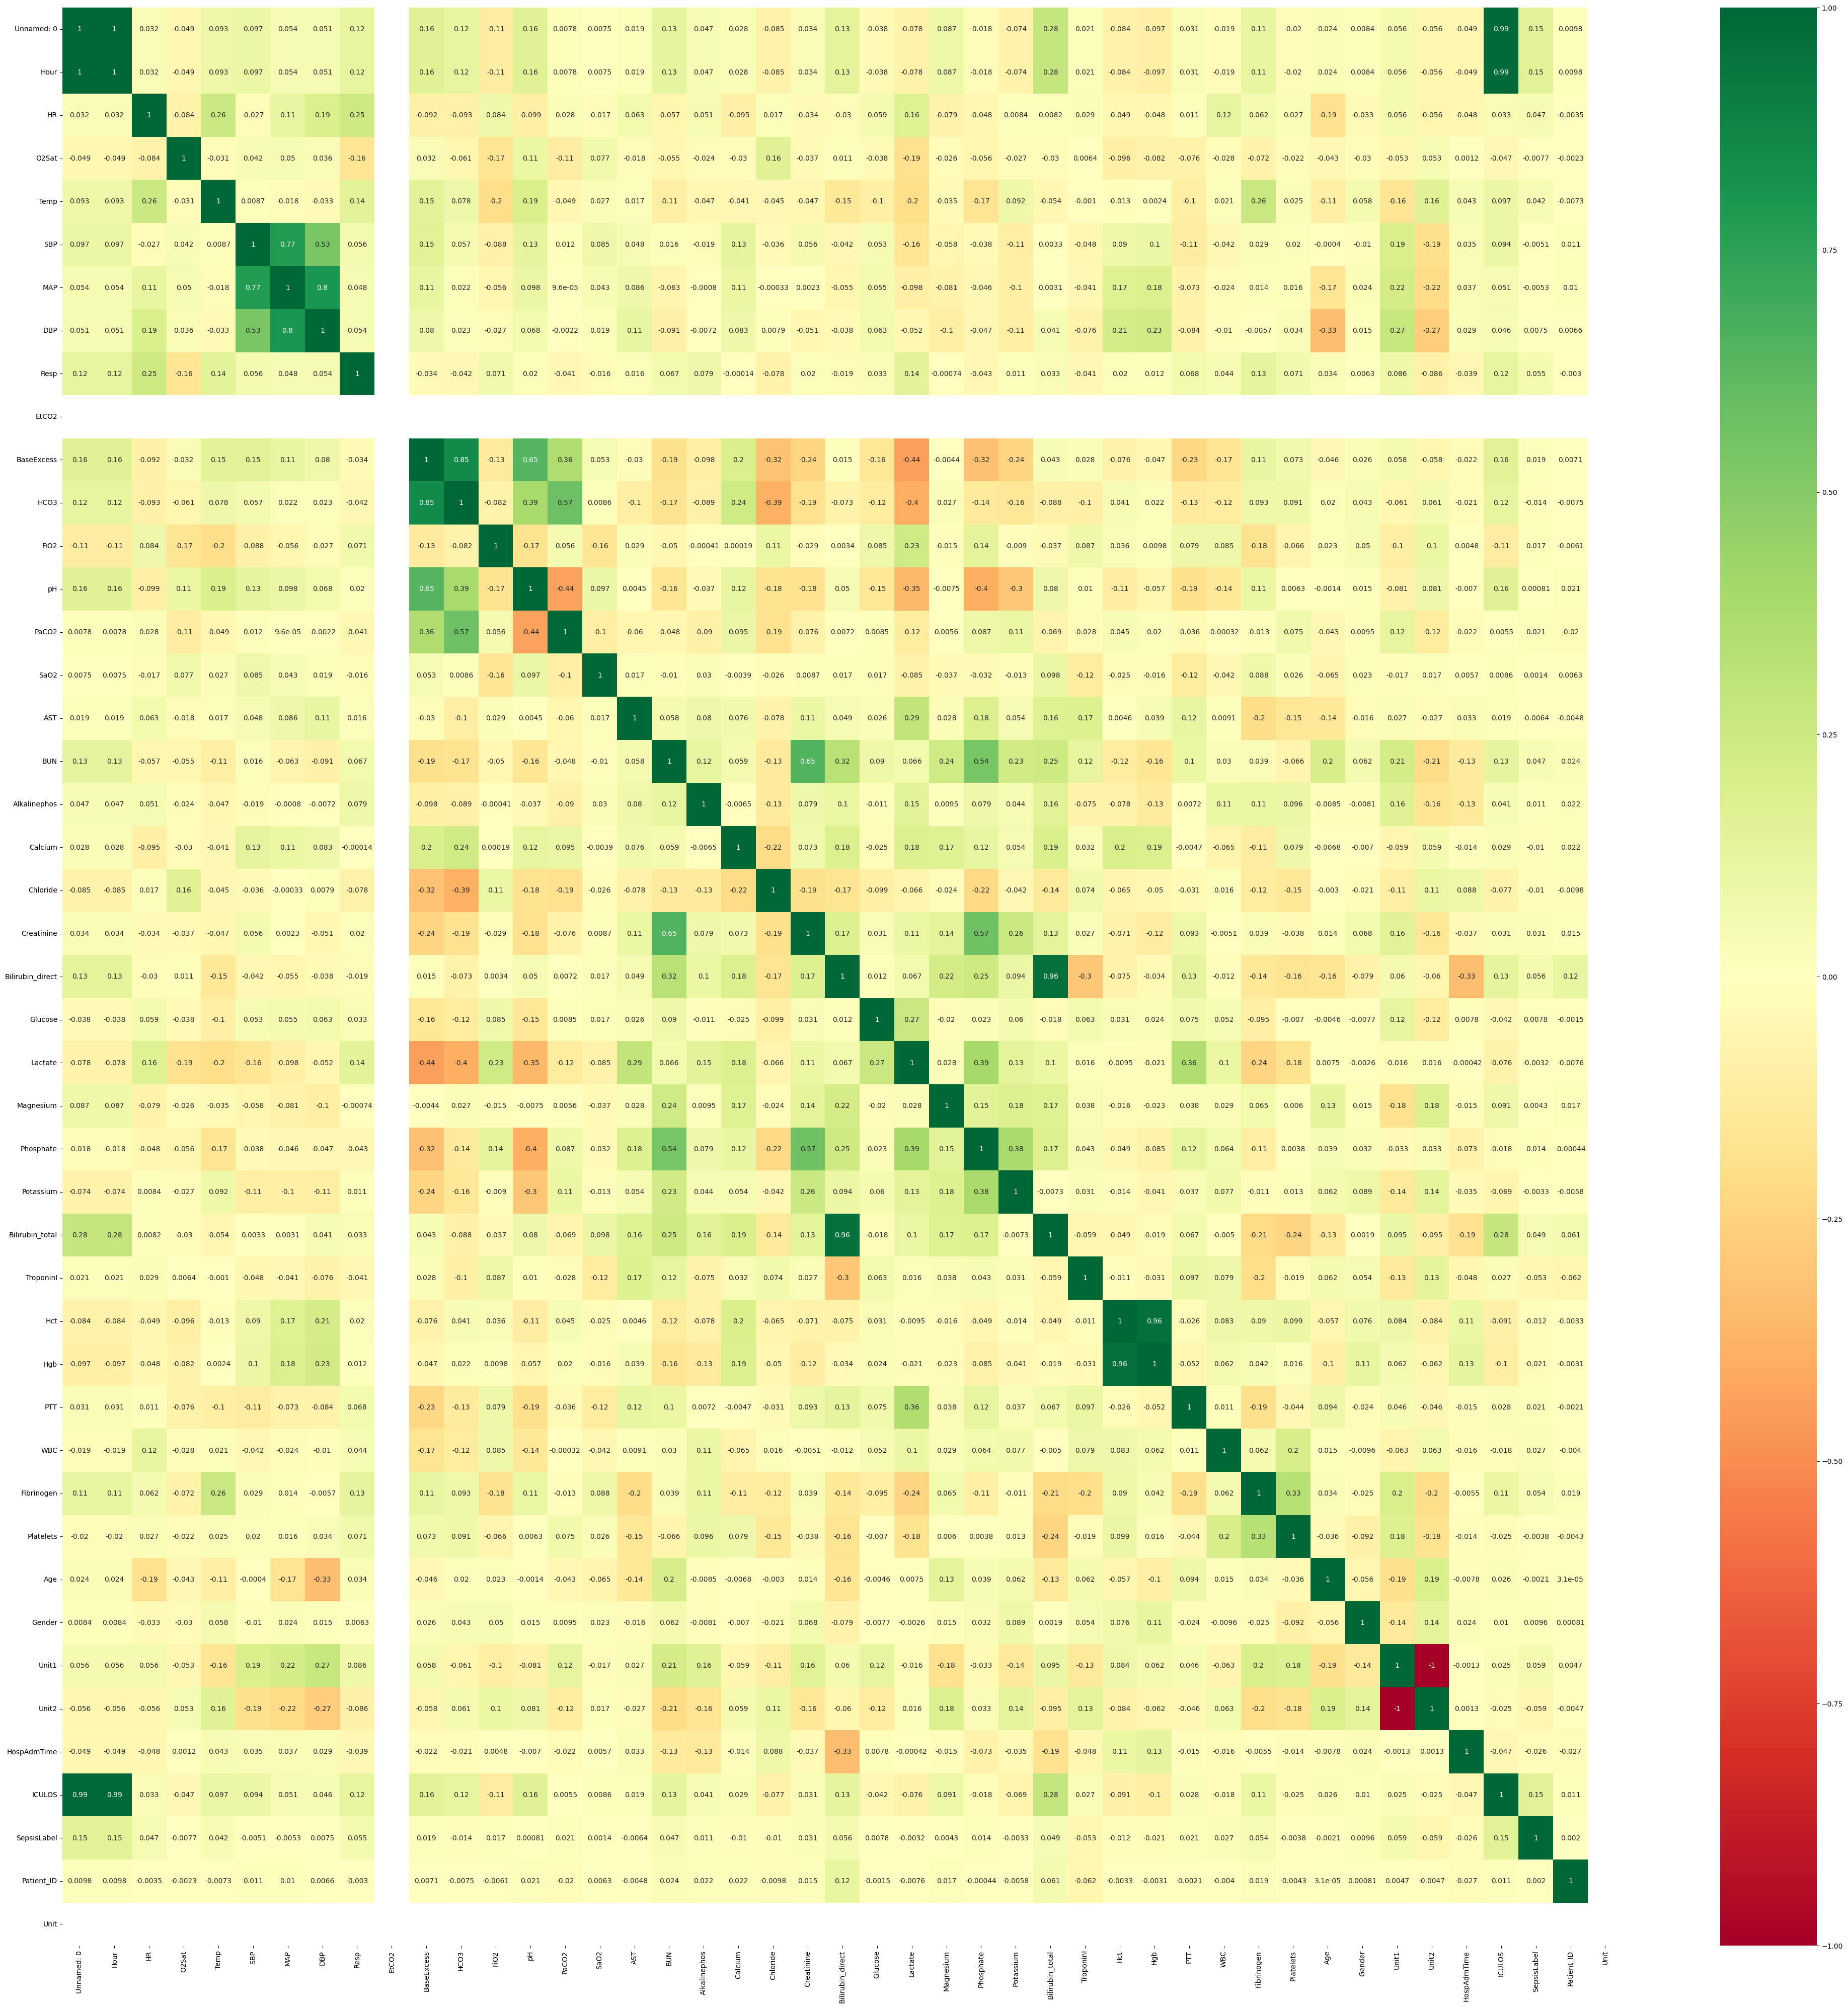

In [ ]:
# correlation matrix to check if there is high correlation between the remaining features

#get correlations of each features in dataset
corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [ ]:
df_train_impute = df_train_mod.copy()
columns_impute = list(df_train_impute.columns)

In [ ]:
# bfill and ffill for imputing

grouped_by_patient = df_train_impute.groupby('Patient_ID')
df_train_impute = grouped_by_patient.apply(lambda x: x.bfill().ffill())

<ipython-input-13-630336680b91>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_train_impute = grouped_by_patient.apply(lambda x: x.bfill().ffill())


In [ ]:
df_train_impute.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,65.0,100.0,35.78,72.0,16.5,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,1,0,17072,NaN
1,1,65.0,100.0,35.78,72.0,16.5,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,2,0,17072,NaN
2,2,78.0,100.0,35.78,42.5,17.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,3,0,17072,NaN
3,3,73.0,100.0,35.78,74.0,17.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,4,0,17072,NaN
4,4,70.0,100.0,35.78,74.0,14.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072,NaN


In [ ]:
# Now let's check the remaining proportion of missing values

null_values = df_train_impute.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

TroponinI           97.357934
Bilirubin_direct    96.256841
Bilirubin_total     66.949754
AST                 66.435590
SaO2                57.282891
Lactate             55.997418
Unit                48.868346
FiO2                36.195592
WBC                  1.511994
Platelets            1.394810
Chloride             1.310656
Hgb                  1.158672
Creatinine           1.029467
Glucose              0.940630
BUN                  0.937719
Temp                 0.853692
Hct                  0.779028
Resp                 0.088710
O2Sat                0.026702
MAP                  0.003037
HR                   0.001139
HospAdmTime          0.001012
Age                  0.000000
Gender               0.000000
ICULOS               0.000000
SepsisLabel          0.000000
Patient_ID           0.000000
Hour                 0.000000
dtype: float64

In [ ]:
# dropping all the columns with null values more than 25% and patient_id

null_col = ['TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2',
            'Unit', 'Patient_ID']
df_train_impute = df_train_impute.drop(columns=null_col)
df_train_impute.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age',
       'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [ ]:
# onehot encoding the gender

one_hot = pd.get_dummies(df_train_impute['Gender'])
df_train_impute = df_train_impute.join(one_hot)
df_train_impute = df_train_impute.drop('Gender', axis=1)

In [ ]:
# function to draw histogram and QQ plot

def diagnostic_plots(df, variable):
    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(121)
    df[variable].hist(bins=30)
    ax = fig.add_subplot(122)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.xlabel(variable)
    plt.show()

In [ ]:
# function to apply different transformations to make the plot gaussian

def try_gaussian(df, col):
  print('actual plot')
  diagnostic_plots(df,col)
  # this applies yeojohnson plot
  df['col_yj'], param = stats.yeojohnson(df[col])
  print('yeojohnson plot')
  diagnostic_plots(df, 'col_yj')
  # this applies exponential transformation
  df['col_1.5'] = df[col]**(1/1.5)
  print('**1/1.5 plot')
  diagnostic_plots(df, 'col_1.5')
  df['col_.5'] = df[col]**(.5)
  print('**.5 plot')
  # this applies inverse transformation
  diagnostic_plots(df, 'col_.5')
  df['col_rec'] = 1 / (df[col]+0.00001)
  diagnostic_plots(df, 'col_rec')
  # this applies logarithmic trasnformation
  df['col_log'] = np.log(df[col]+1)
  diagnostic_plots(df, 'col_log')

In [ ]:
import pandas as pd
from scipy.stats import shapiro

def try_gaussian(dataframe, column_name):
    """
    Function to test if a given column in a dataframe follows a Gaussian distribution
    using the Shapiro-Wilk test.
    """
    # Extracting the column values
    column_values = dataframe[column_name].dropna().values  # dropping NaN values

    # Conducting the Shapiro-Wilk test
    stat, p = shapiro(column_values)

    # Interpreting the results
    alpha = 0.05
    if p > alpha:
        print(f"{column_name} looks Gaussian (Fail to Reject H0)")
    else:
        print(f"{column_name} does not look Gaussian (Reject H0)")

# Sample dataframe
# df_train_impute = pd.DataFrame({'O2Sat': ... })  # your data here

lst = ['O2Sat', 'Temp', 'MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets']
for i in lst:
    print(i)
    try_gaussian(df_train_impute, i)


O2Sat


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


O2Sat does not look Gaussian (Reject H0)
Temp
Temp does not look Gaussian (Reject H0)
MAP
MAP does not look Gaussian (Reject H0)
BUN
BUN does not look Gaussian (Reject H0)
Creatinine
Creatinine does not look Gaussian (Reject H0)
Glucose
Glucose does not look Gaussian (Reject H0)
WBC
WBC does not look Gaussian (Reject H0)
Platelets
Platelets does not look Gaussian (Reject H0)


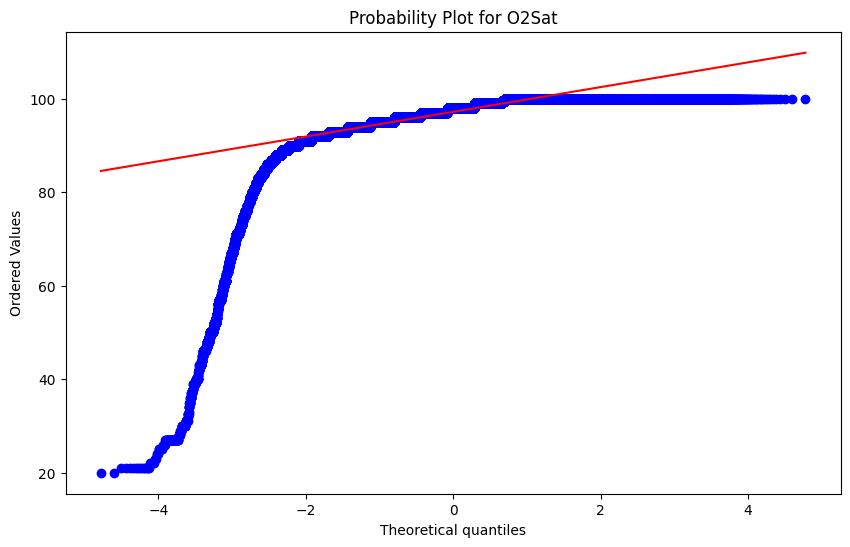

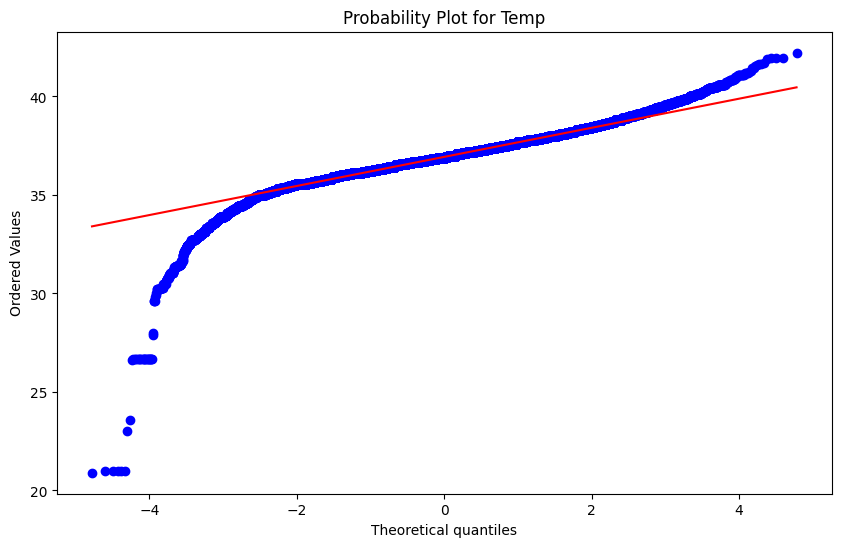

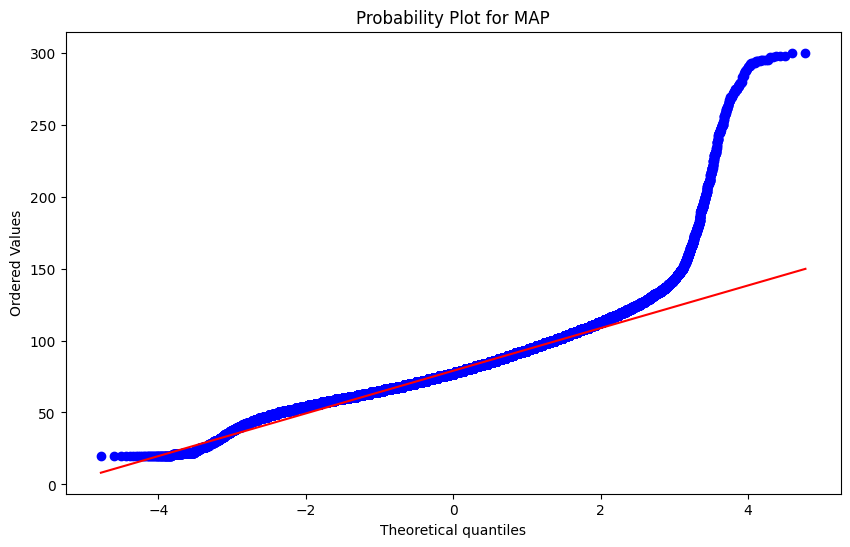

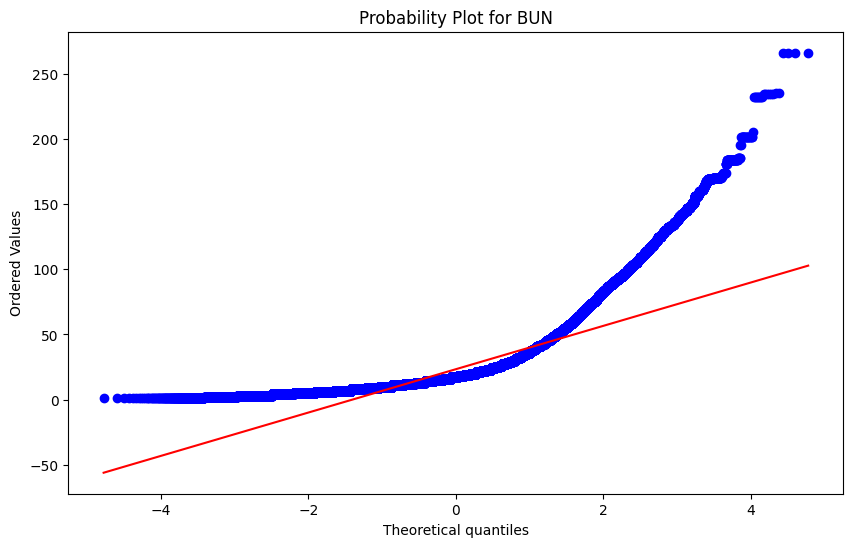

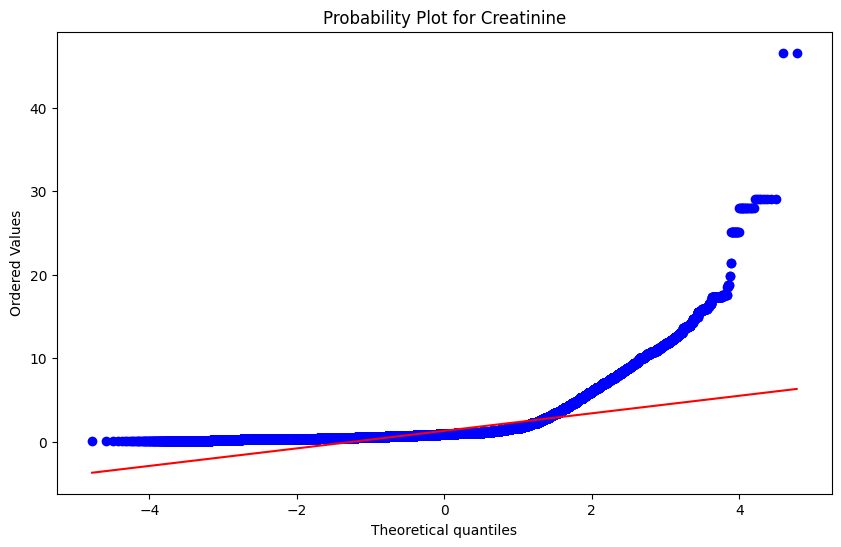

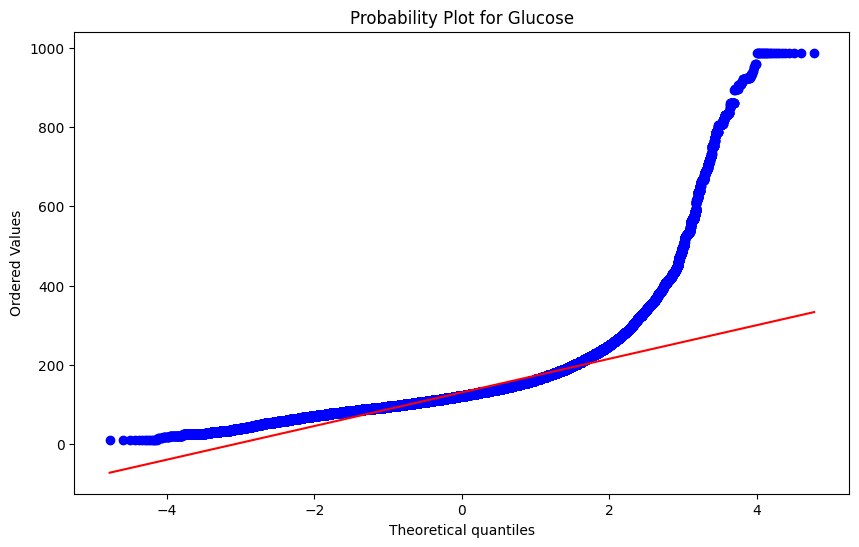

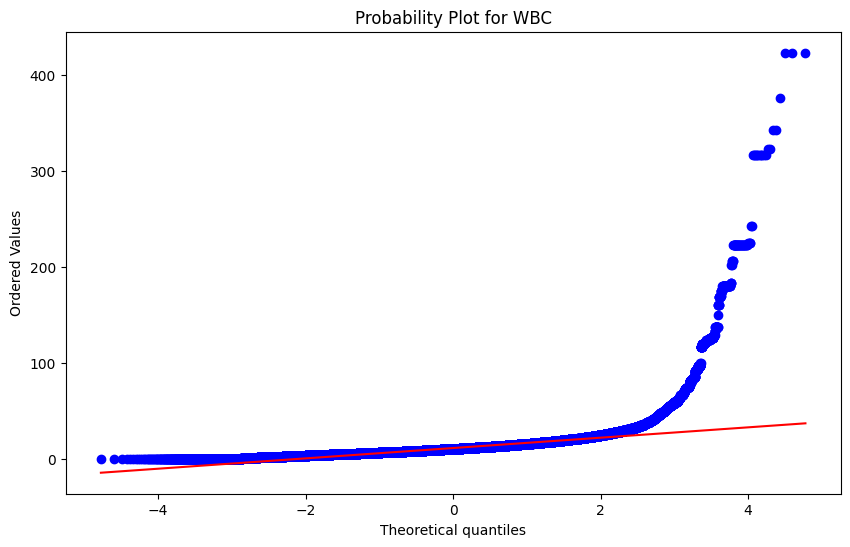

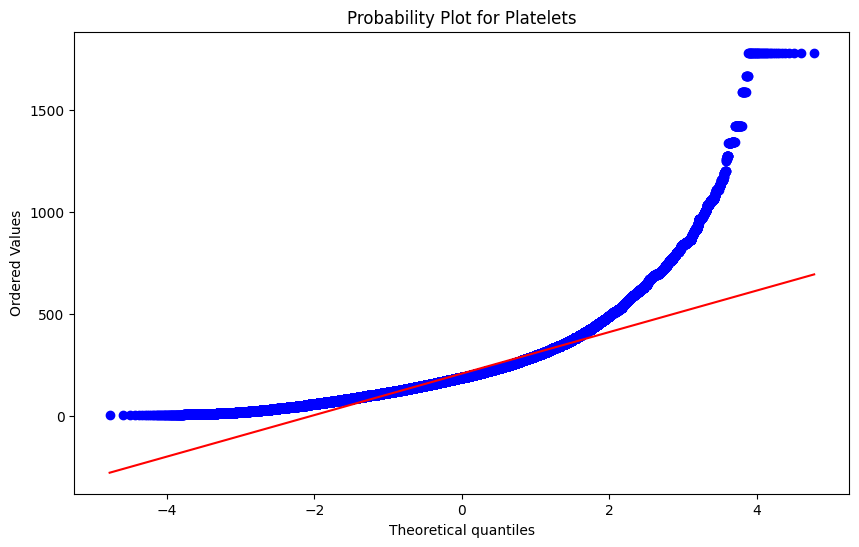

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot

def draw_probability_plot(dataframe, column_name):
    """
    Draw a probability plot (Q-Q plot) for a given column in a dataframe.
    """
    # Extracting the column values
    column_values = dataframe[column_name].dropna().values  # Drop NaN values

    # Create the plot
    plt.figure(figsize=(10, 6))
    probplot(column_values, dist="norm", plot=plt)
    plt.title(f"Probability Plot for {column_name}")
    plt.show()

# Assuming df_train_impute is your dataframe containing the columns specified in lst

for column in lst:
    draw_probability_plot(df_train_impute, column)


In [ ]:
import pandas as pd
from scipy.stats import shapiro

def try_gaussian(dataframe, column_name):
    """
    Function to test if a given column in a dataframe follows a Gaussian distribution
    using the Shapiro-Wilk test.
    """
    # Extracting the column values
    column_values = dataframe[column_name].dropna().values  # dropping NaN values

    # Conducting the Shapiro-Wilk test
    stat, p = shapiro(column_values)

    # Interpreting the results
    alpha = 0.05
    if p > alpha:
        print(f"{column_name} looks Gaussian (Fail to Reject H0)")
    else:
        print(f"{column_name} does not look Gaussian (Reject H0)")

# Sample dataframe
# df_train_impute = pd.DataFrame({'O2Sat': ... })  # your data here

lst = ['O2Sat', 'Temp', 'MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets']
for i in lst:
    print(i)
    try_gaussian(df_train_impute, i)


O2Sat
O2Sat does not look Gaussian (Reject H0)
Temp
Temp does not look Gaussian (Reject H0)
MAP


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


MAP does not look Gaussian (Reject H0)
BUN
BUN does not look Gaussian (Reject H0)
Creatinine
Creatinine does not look Gaussian (Reject H0)
Glucose
Glucose does not look Gaussian (Reject H0)
WBC
WBC does not look Gaussian (Reject H0)
Platelets
Platelets does not look Gaussian (Reject H0)


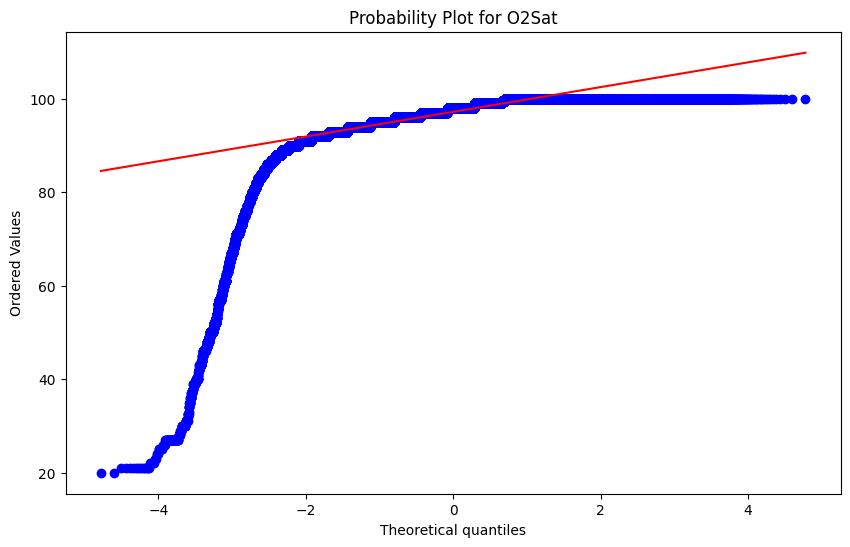

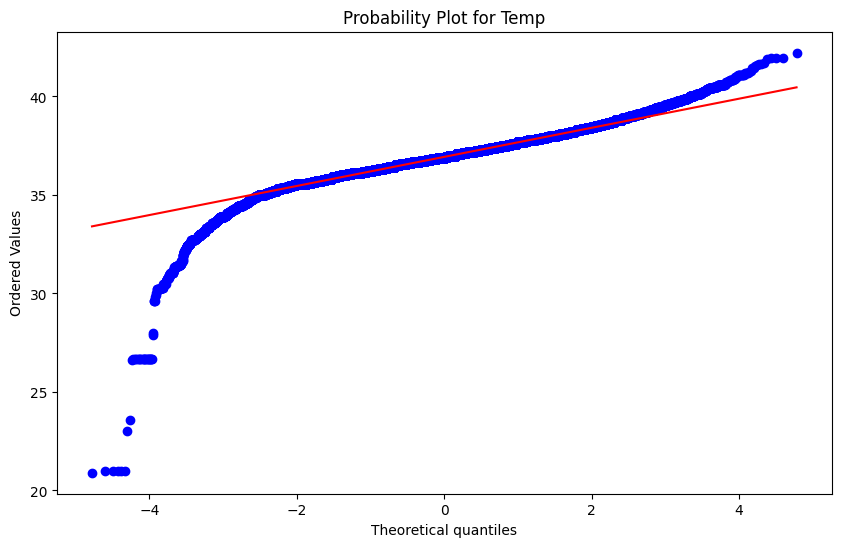

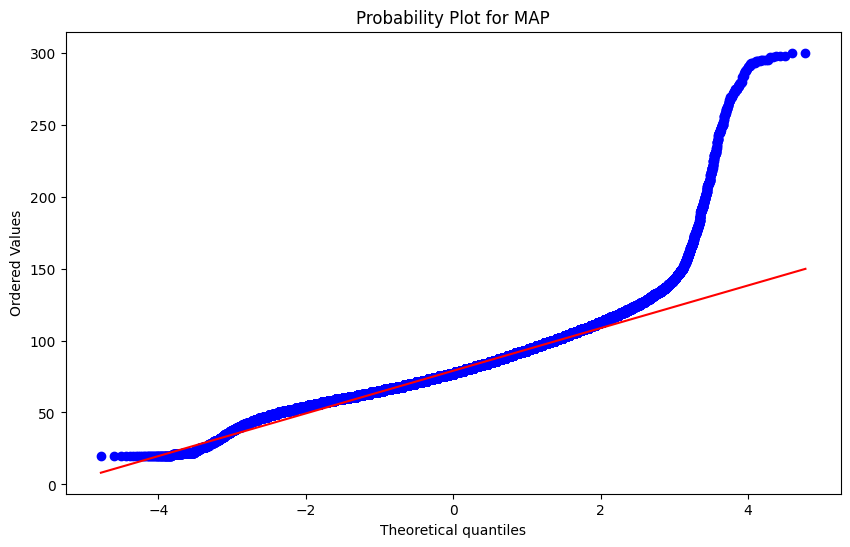

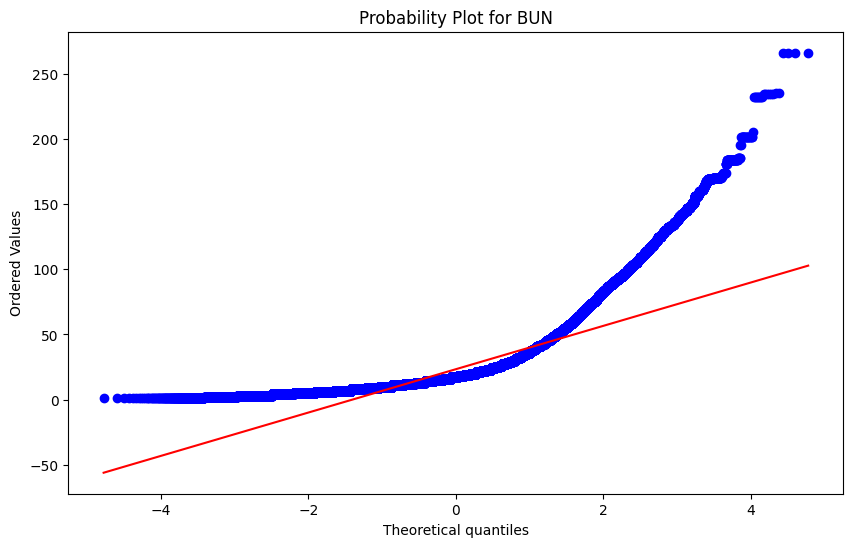

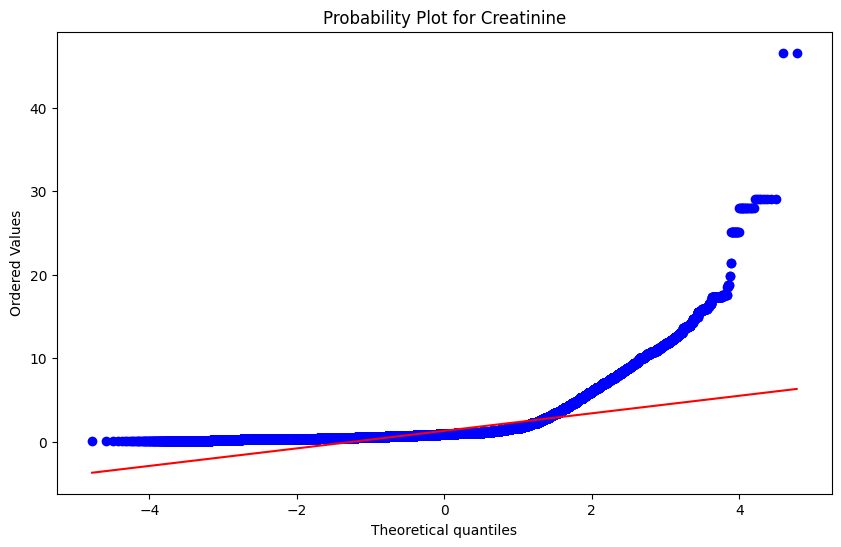

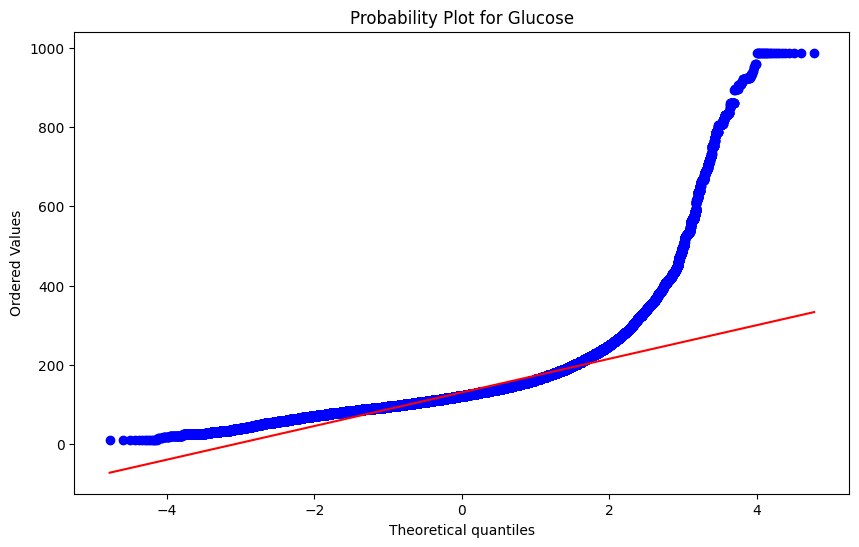

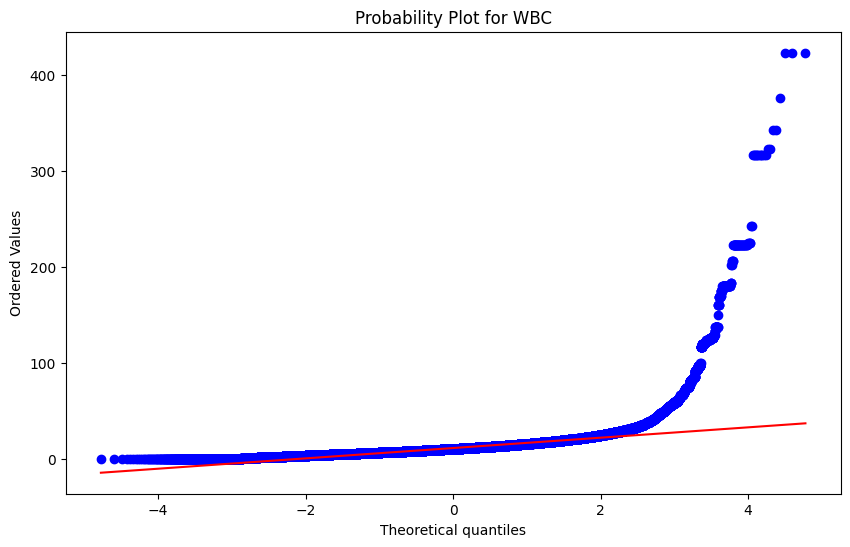

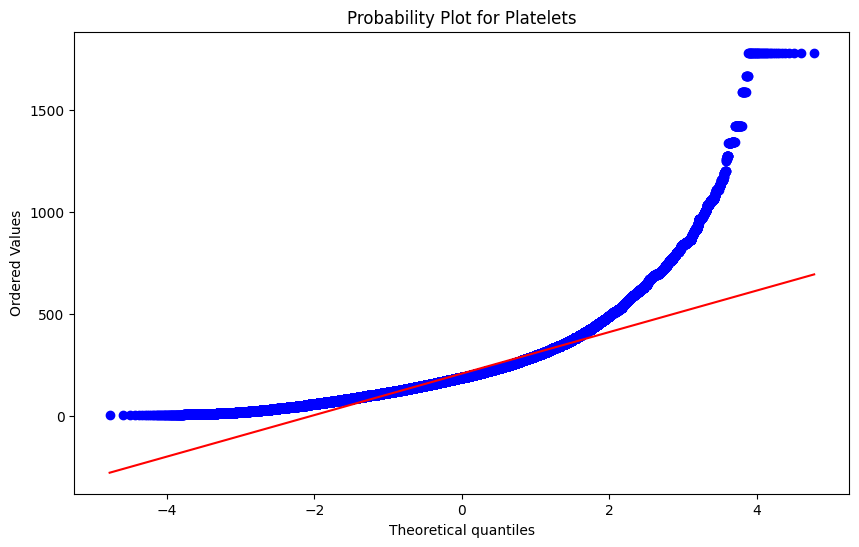

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot

def draw_probability_plot(dataframe, column_name):
    """
    Draw a probability plot (Q-Q plot) for a given column in a dataframe.
    """
    # Extracting the column values
    column_values = dataframe[column_name].dropna().values  # Drop NaN values

    # Create the plot
    plt.figure(figsize=(10, 6))
    probplot(column_values, dist="norm", plot=plt)
    plt.title(f"Probability Plot for {column_name}")
    plt.show()

# Assuming df_train_impute is your dataframe containing the columns specified in lst

for column in lst:
    draw_probability_plot(df_train_impute, column)


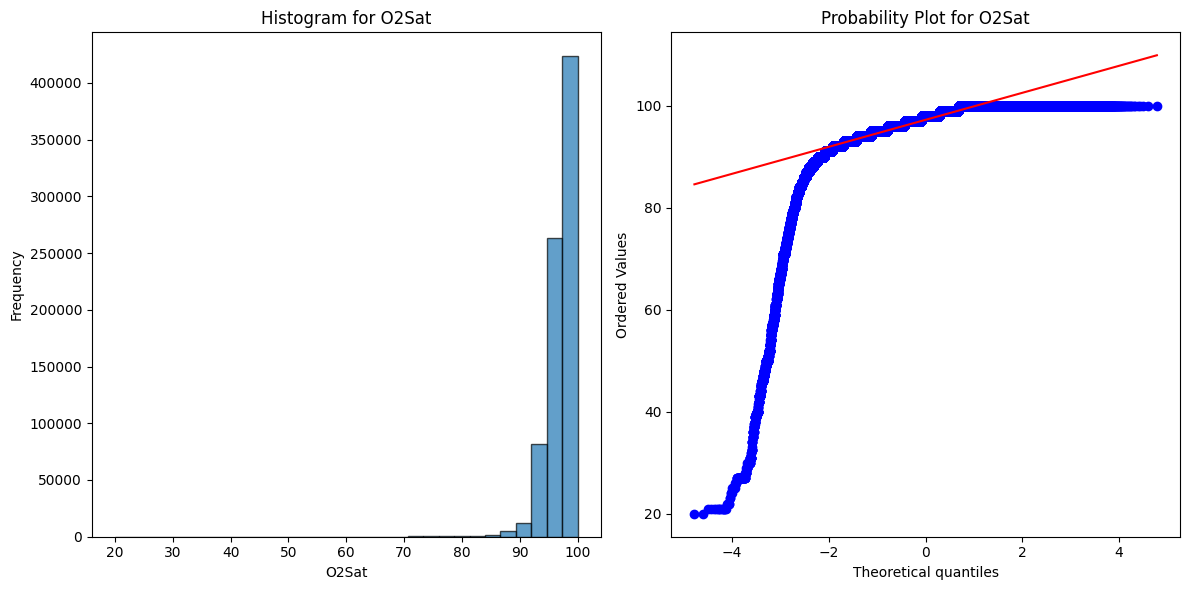

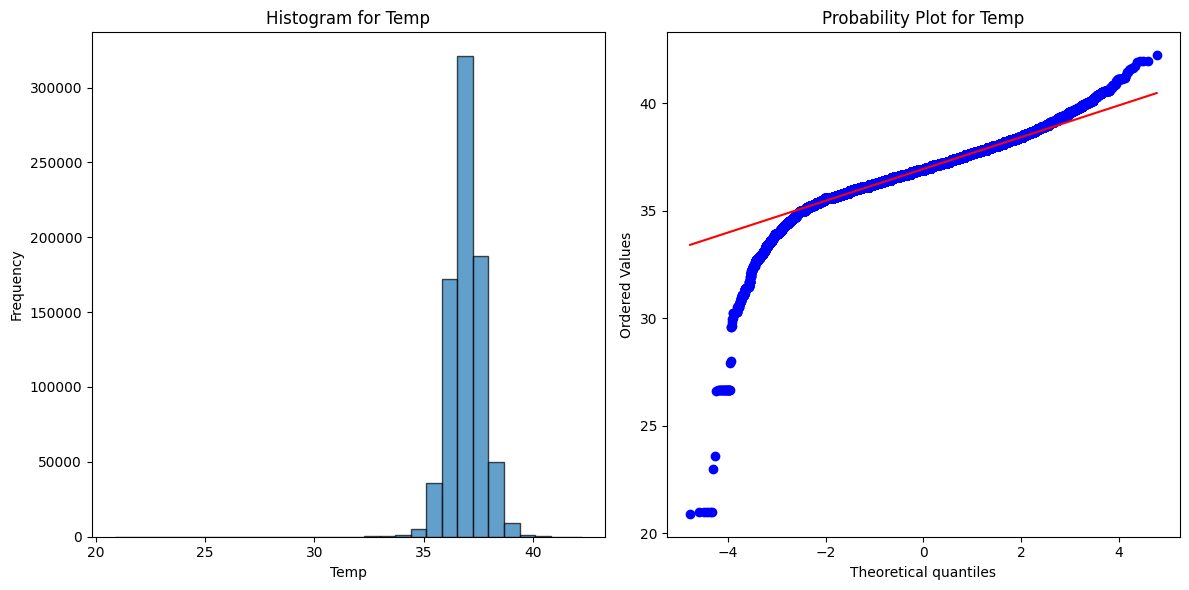

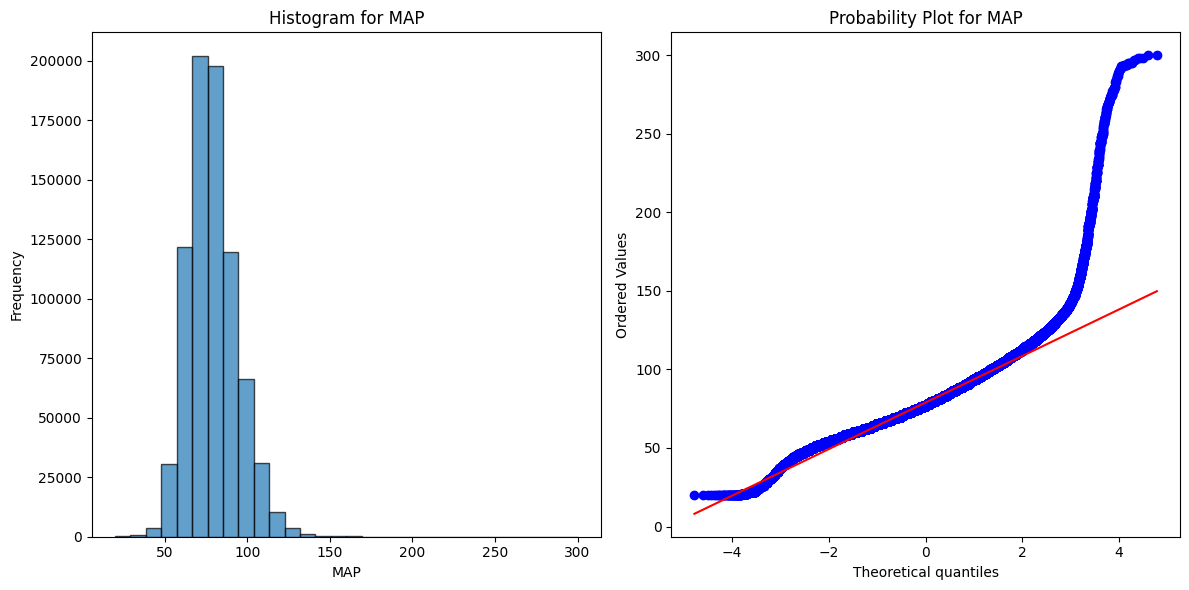

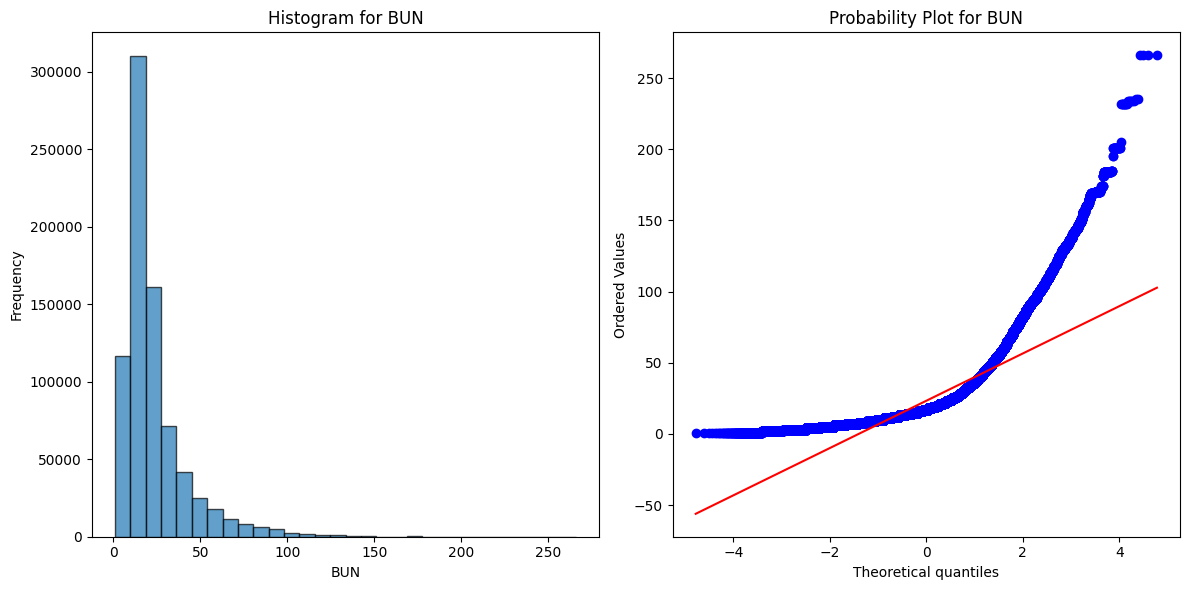

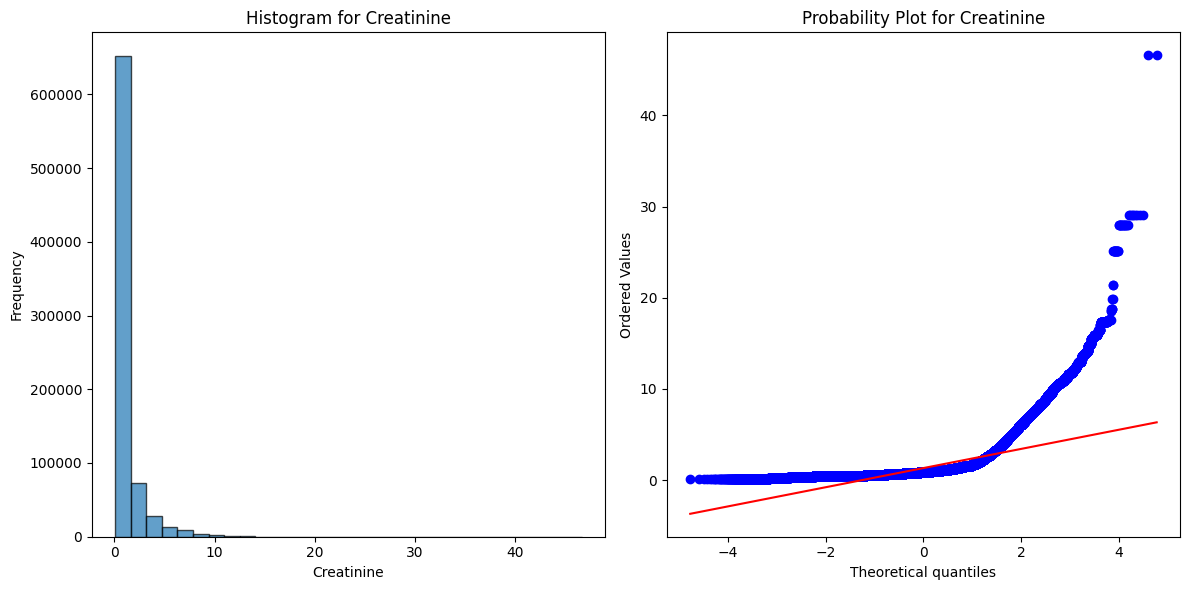

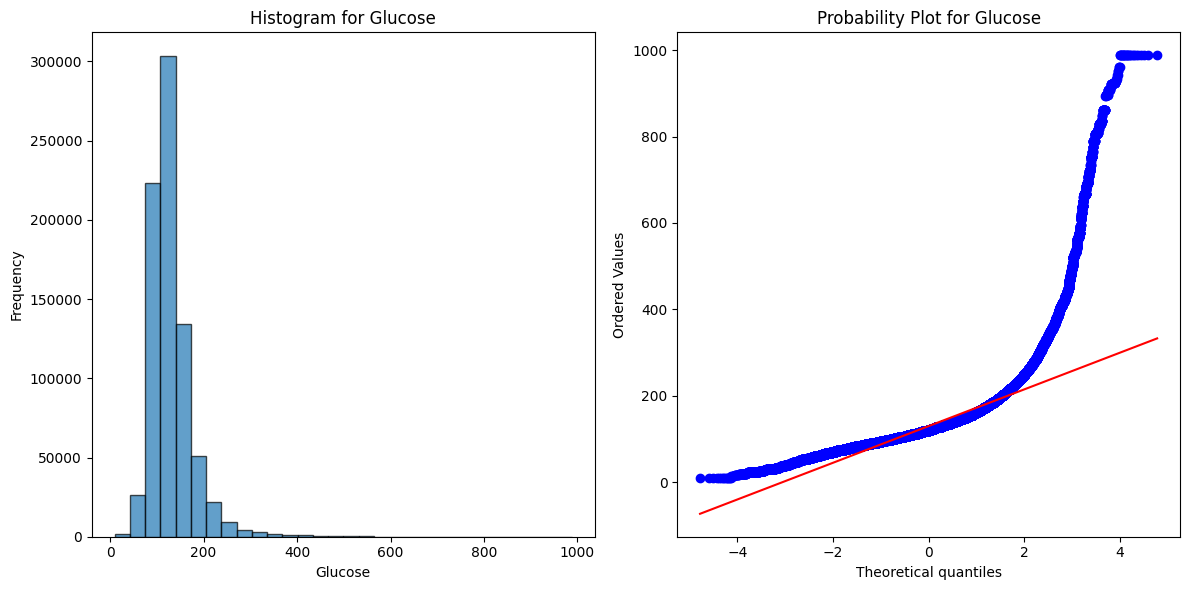

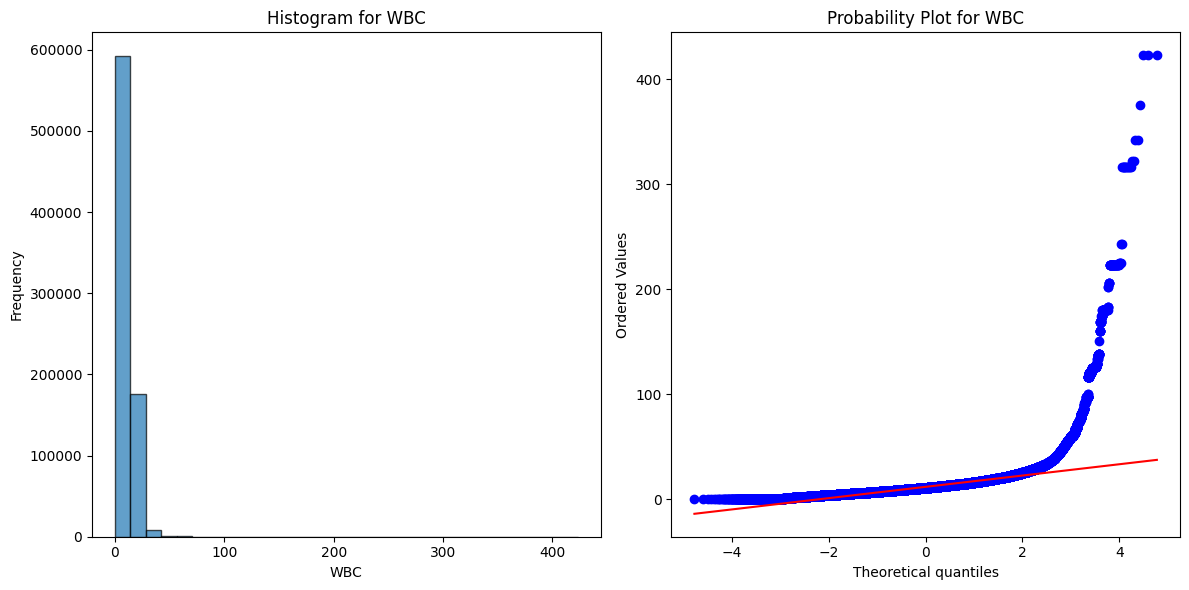

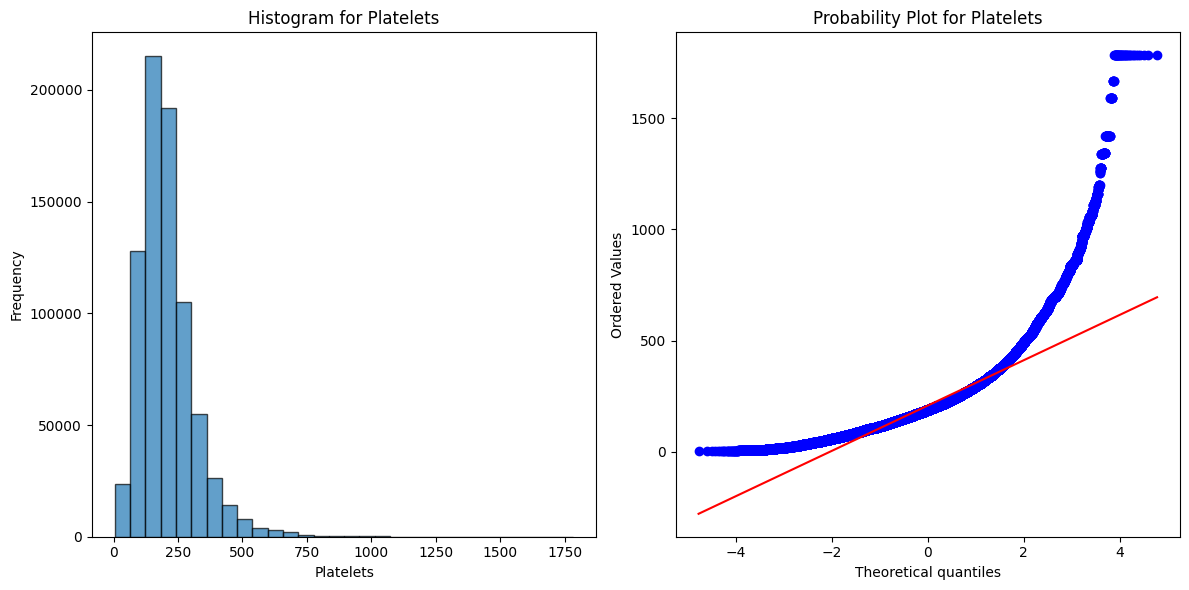

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot

def draw_histogram_and_probability_plot(dataframe, column_name):
    """
    Draw a histogram and a probability plot (Q-Q plot) side by side for a given column in a dataframe.
    """
    # Extracting the column values
    column_values = dataframe[column_name].dropna().values  # Drop NaN values

    # Create subplots
    fig, axarr = plt.subplots(1, 2, figsize=(12, 6))

    # Plot histogram on the first subplot
    axarr[0].hist(column_values, bins=30, edgecolor='black', alpha=0.7)
    axarr[0].set_title(f"Histogram for {column_name}")
    axarr[0].set_xlabel(column_name)
    axarr[0].set_ylabel("Frequency")

    # Plot probability plot on the second subplot
    probplot(column_values, dist="norm", plot=axarr[1])
    axarr[1].set_title(f"Probability Plot for {column_name}")

    # Display the plots
    plt.tight_layout()
    plt.show()

# Assuming df_train_impute is your dataframe containing the columns specified in lst

for column in lst:
    draw_histogram_and_probability_plot(df_train_impute, column)


In [ ]:
df_train_impute.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,BUN,Chloride,Creatinine,Glucose,Hct,Hgb,WBC,Platelets,Age,HospAdmTime,ICULOS,SepsisLabel,0,1
0,0,65.0,100.0,35.78,72.0,16.5,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,-0.02,1,0,1,0
1,1,65.0,100.0,35.78,72.0,16.5,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,-0.02,2,0,1,0
2,2,78.0,100.0,35.78,42.5,17.0,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,-0.02,3,0,1,0
3,3,73.0,100.0,35.78,74.0,17.0,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,-0.02,4,0,1,0
4,4,70.0,100.0,35.78,74.0,14.0,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,-0.02,5,0,1,0


In [ ]:
# by oserving different plots, it can be concluded that only log was somewhat effective and that too for MAP, BUN, Creatinine, Glucose, WBC & Plateletes
# therefore applying log transformations on the above columns

columns_normalized = ['MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
for i in columns_normalized:
  df_train_impute[i] = np.log(df_train_impute[i]+1)

In [ ]:
df_train_impute.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,BUN,Chloride,Creatinine,Glucose,Hct,Hgb,WBC,Platelets,Age,HospAdmTime,ICULOS,SepsisLabel,0,1
0,0,65.0,100.0,35.78,4.290459,16.5,3.178054,104.0,0.587787,5.087596,29.7,9.5,2.509599,5.802118,68.54,-0.02,1,0,1,0
1,1,65.0,100.0,35.78,4.290459,16.5,3.178054,104.0,0.587787,5.087596,29.7,9.5,2.509599,5.802118,68.54,-0.02,2,0,1,0
2,2,78.0,100.0,35.78,3.772761,17.0,3.178054,104.0,0.587787,5.087596,29.7,9.5,2.509599,5.802118,68.54,-0.02,3,0,1,0
3,3,73.0,100.0,35.78,4.317488,17.0,3.178054,104.0,0.587787,5.087596,29.7,9.5,2.509599,5.802118,68.54,-0.02,4,0,1,0
4,4,70.0,100.0,35.78,4.317488,14.0,3.178054,104.0,0.587787,5.087596,29.7,9.5,2.509599,5.802118,68.54,-0.02,5,0,1,0


In [ ]:
# standard normalization

scaler = StandardScaler()
df_train_impute[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']] = scaler.fit_transform(df_train_impute[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']])
df_train_impute.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,BUN,Chloride,Creatinine,Glucose,Hct,Hgb,WBC,Platelets,Age,HospAdmTime,ICULOS,SepsisLabel,0,1
0,0,-1.170030,0.865243,-1.548869,-0.397650,-0.419685,0.322965,-0.226541,-0.410796,0.854631,-0.311111,-0.652538,0.149678,1.140763,68.54,-0.02,1,0,1,0
1,1,-1.170030,0.865243,-1.548869,-0.397650,-0.419685,0.322965,-0.226541,-0.410796,0.854631,-0.311111,-0.652538,0.149678,1.140763,68.54,-0.02,2,0,1,0
2,2,-0.407913,0.865243,-1.548869,-3.187955,-0.326969,0.322965,-0.226541,-0.410796,0.854631,-0.311111,-0.652538,0.149678,1.140763,68.54,-0.02,3,0,1,0
3,3,-0.701035,0.865243,-1.548869,-0.251970,-0.326969,0.322965,-0.226541,-0.410796,0.854631,-0.311111,-0.652538,0.149678,1.140763,68.54,-0.02,4,0,1,0
4,4,-0.876908,0.865243,-1.548869,-0.251970,-0.883265,0.322965,-0.226541,-0.410796,0.854631,-0.311111,-0.652538,0.149678,1.140763,68.54,-0.02,5,0,1,0


In [ ]:
df_train_impute = df_train_impute.dropna()

In [ ]:
null_values = df_train_impute.isnull().mean()*100
null_values

Hour           0.0
HR             0.0
O2Sat          0.0
Temp           0.0
MAP            0.0
Resp           0.0
BUN            0.0
Chloride       0.0
Creatinine     0.0
Glucose        0.0
Hct            0.0
Hgb            0.0
WBC            0.0
Platelets      0.0
Age            0.0
HospAdmTime    0.0
ICULOS         0.0
SepsisLabel    0.0
0              0.0
1              0.0
dtype: float64

In [ ]:
# this function will transform the dataframe (for final testing) in the compatible
# format for the input of the model
# this will make it easier to get the dataframe ready in a single go for prediction

def get_data_ready(df):
  columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium',
  'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2'}
  df = df.assign(Unit=df['Unit1'] + df['Unit2'])
  # dropping columns based on redundancy
  df = df.drop(columns=columns_drop)
  grouped_by_patient = df.groupby('Patient_ID')
  # imputing backfill and forward fill
  df = grouped_by_patient.apply(lambda x: x.bfill().ffill())
  # dropping all the columns with null values more than 25% and patient_id
  null_col = ['TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2','Unit', 'Patient_ID']
  df = df.drop(columns=null_col)
  # gaussian transformation
  columns_normalized = ['MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
  for i in columns_normalized:
    df[i] = np.log(df[i]+1)
  # normailizing
  scaler = StandardScaler()
  df[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']] = scaler.fit_transform(df[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']])
  # onehot encoding the gender
  one_hot = pd.get_dummies(df['Gender'])
  df = df.join(one_hot)
  df = df.drop('Gender', axis=1)
  df = df.dropna()
  return df

In [ ]:
# this fucntion calculates different evaluation parameters of a model

def evaluate_model(y_true,y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  print("Accuracy:", accuracy)
  precision = precision_score(y_true, y_pred)
  print("Precision:", precision)
  recall = recall_score(y_true, y_pred)
  print("Recall:", recall)
  f1 = f1_score(y_true, y_pred)
  print("F1 Score:", f1)
  auc = roc_auc_score(y_true, y_pred)
  print("AUC-ROC:", auc)
  mae = mean_absolute_error(y_true, y_pred)
  print("Mean Absolute Error:", mae)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  print("Root Mean Squared Error:", rmse)
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

In [ ]:
# checking the distribution of data points between the two classes

majority_class = df_train_impute[df_train_impute['SepsisLabel'] == 0]
minority_class = df_train_impute[df_train_impute['SepsisLabel'] == 1]
print('number of sepsis label 1 is {}'.format(len(minority_class)))
print('while number of sepsis label 0 is {}'.format(len(majority_class)))

number of sepsis label 1 is 15284
while number of sepsis label 0 is 750935


In [ ]:
# Undersampling

majority_class_subset = majority_class.sample(n=2*len(minority_class))
df_train_impute = pd.concat([majority_class_subset, minority_class])

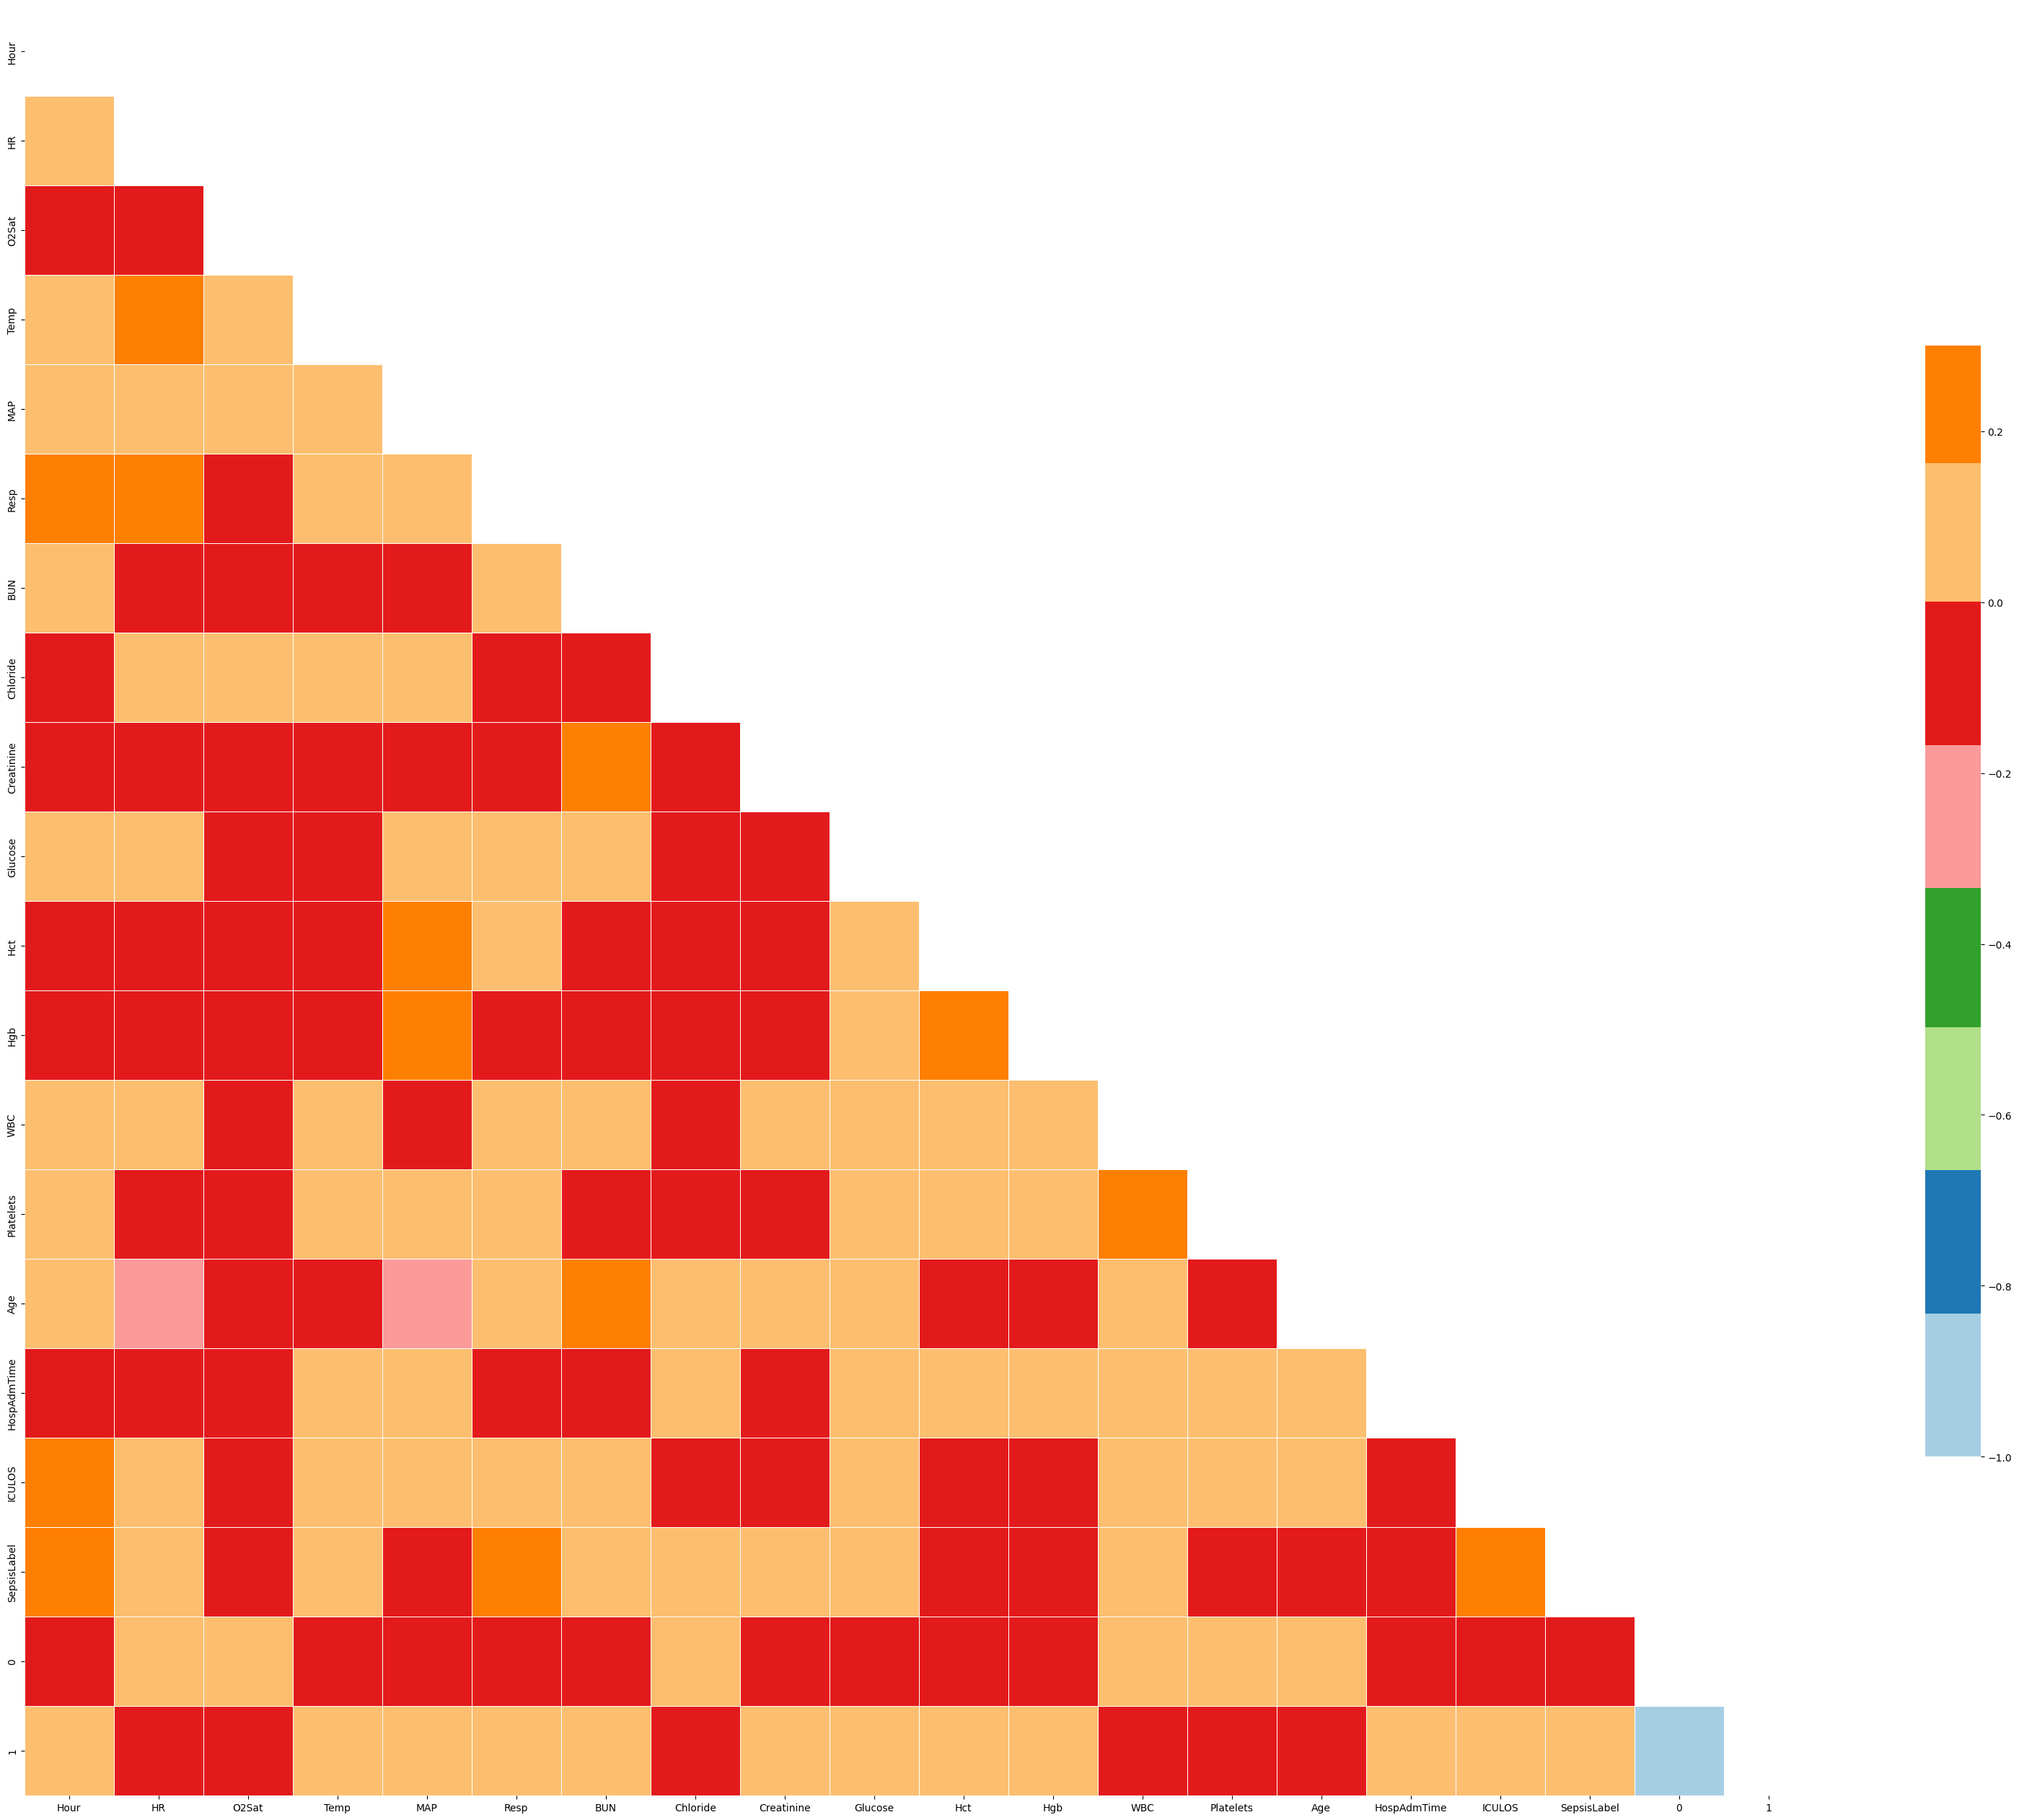

In [ ]:
corr_matrix(df_train_impute)

In [ ]:
# train test split for the imputed output
X = df_train_impute.drop('SepsisLabel', axis=1)
y = df_train_impute['SepsisLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
df_train_impute.shape

(45852, 20)

In [ ]:
X.shape

(45852, 19)

In [ ]:
y.shape

(45852,)

In [ ]:
X_train.shape

(36681, 19)

In [ ]:
y_train.shape

(36681,)

In [ ]:
 y_test.shape

(9171,)

In [ ]:
y_test

683149    0
726465    0
725236    1
46421     0
651677    0
         ..
109900    0
159032    0
306278    0
673683    1
417983    0
Name: SepsisLabel, Length: 9171, dtype: int64

رندوم فارست معمولی

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have loaded your data into X_train, X_test, y_train, y_test

# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Define and fit the RandomForestClassifier
model_RandomForest = RandomForestClassifier(n_estimators=300, random_state=0)
model_RandomForest.fit(X_train, y_train)

# Make predictions
rfc_predictions = model_RandomForest.predict(X_test)
# [rf_predictions, DT_predictions, xgb_predictions, meta_predictions

**Randomforest**

In [ ]:
evaluate_model(y_test,rfc_predictions)

AUC: 0.9608526338344513


**Random Forest Feature Importance PLot**

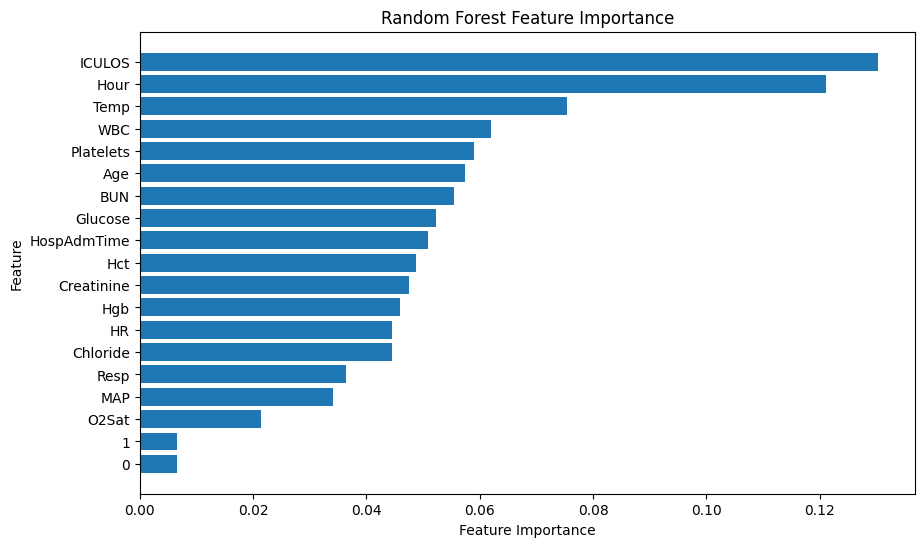

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Define and fit the RandomForestClassifier as I did before
model = RandomForestClassifier(n_estimators=300, random_state=0)
model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Get the names of the features (assuming X_train is a DataFrame)
feature_names = X_train.columns

# Create a DataFrame to store feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

رندوم فارست احتمالاتی

In [ ]:

rf_model_prob = RandomForestClassifier(n_estimators=300, random_state=42)

rf_model_prob.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:

# Now you can use the loaded model to make predictions
rf_predictions = rf_model_prob.predict_proba(X_test)[:, 1]


In [ ]:
from sklearn.metrics import roc_auc_score

def evaluate_model(y_true, y_pred_probs):
    auc = roc_auc_score(y_true, y_pred_probs)
    print("AUC:", auc)

# Assuming you have already imported the necessary libraries and defined your rf_model and rf_predictions
evaluate_model(y_test, rf_predictions)


AUC: 0.9918161262441325


In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score

def evaluate_model(y_true, y_pred_probs):
    auc = roc_auc_score(y_true, y_pred_probs)
    y_pred_binary = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

    f1 = f1_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    accuracy = accuracy_score(y_true, y_pred_binary)

    print("AUC:", auc)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)

# Assuming you have already imported the necessary libraries and defined your rf_model and rf_predictions
evaluate_model(y_test, rf_predictions)

AUC: 0.9918161262441325
F1 Score: 0.9419191919191918
Precision: 0.9218412109978376
Recall: 0.962891255243627
Accuracy: 0.9598735143386763


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
#xgboost

In [ ]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_model_prob = xgb.XGBClassifier(
    max_depth=5,  # Adjust the maximum depth as needed
    learning_rate=0.3,  # Adjust the learning rate as needed
    objective='binary:logistic',  # Set the objective for binary classification
    random_state=0  # Set the random seed
)

# Train the XGBoost classifier on your training data
xgb_model_prob.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
import xgboost as xgb

# Fit the XGBoost model on your training data
xgb_model_prob.fit(X_train, y_train)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
# Use the trained XGBoost model to make predictions on the test data
xgb_predictions = xgb_model_prob.predict(X_test)

# If you want probability scores (for binary classification)
xgb_probabilities = xgb_model_prob.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy score
accuracy = accuracy_score(y_test, xgb_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
report = classification_report(y_test, xgb_predictions)
print('Classification Report:\n', report)

# Confusion matrix
confusion = confusion_matrix(y_test, xgb_predictions)
print('Confusion Matrix:\n', confusion)


Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6072
           1       0.83      0.75      0.79      3099

    accuracy                           0.86      9171
   macro avg       0.86      0.84      0.85      9171
weighted avg       0.86      0.86      0.86      9171

Confusion Matrix:
 [[5599  473]
 [ 768 2331]]


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate the AUC score for the binary classification
auc_score = roc_auc_score(y_test, xgb_probabilities)
print(f'AUC Score: {auc_score:.2f}')


AUC Score: 0.93


In [ ]:
xgb_probabilities.shape

(9171,)

**XGBoost**

**XGBoost Feature Imortance plot**

<Figure size 1000x600 with 0 Axes>

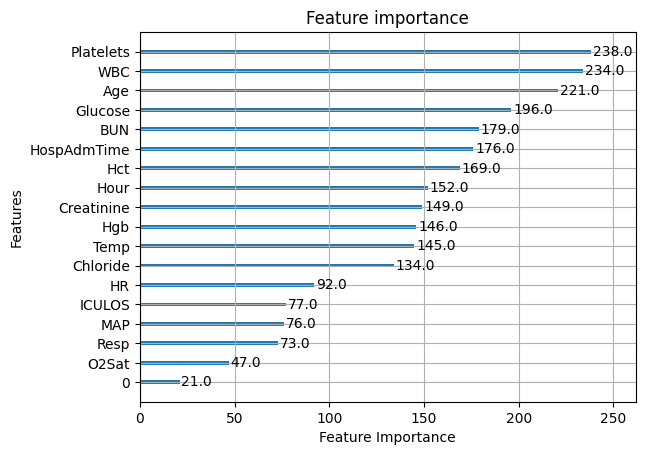

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Create a figure for the feature importance plot
plt.figure(figsize=(10, 6))

# Plot the feature importance
xgb.plot_importance(xgb_model_prob, importance_type='weight', xlabel='Feature Importance')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:34:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


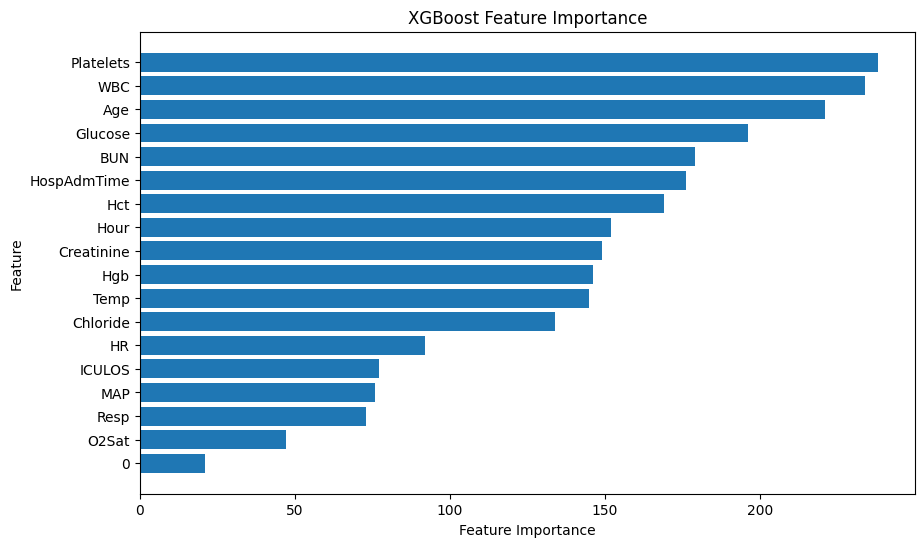

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd

# Train your XGBoost model as I did before
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {
    'max_depth': 5,
    'eta': 0.3,
    'silent': 1,
    'objective': 'binary:logistic'
}
num_round = 100
bst = xgb.train(param, dtrain, num_round)

# Get feature importances from the trained model
feature_importances = bst.get_fscore()

# Convert feature importances to a DataFrame for sorting
feature_importance_df = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

In [ ]:
xgb_probabilities.shape

(9171,)

Decision Tree Classifier FOR PROBABILISTIC AND NON PROBABILISTIC MODEL HAVE SAME RESULTS, BECAUSE DecisionTreeClassifier IS NOT-PROBABILISTIC TECHNIQUE.

when working with DecisionTreeClassifier, the results will be the same for both prediction modes in terms of the predicted class labels, and the AUC will also be the same in both cases.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Assuming you have already loaded and preprocessed your data into df_train_impute

# 1. Split the data into features (X) and target (y)
X = df_train_impute.drop('SepsisLabel', axis=1)
y = df_train_impute['SepsisLabel']

# Convert feature names to strings
X.columns = X.columns.astype(str)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# 4. Train the classifier on the training data
clf.fit(X_train, y_train)

# 5. Get the binary predictions for the test data (0 or 1)
DecisionTree_predictions = clf.predict(X_test)

# 6. Calculate the AUC (Area Under the ROC Curve) for binary predictions
auc = roc_auc_score(y_test, DecisionTree_predictions)
print(f'AUC: {auc:.4f}')


AUC: 0.8949


In [ ]:
DecisionTree_predictions.shape

(9171,)

In [ ]:
#Non-Probabilistic Decision Tree

**Decision Tree Feature importance**

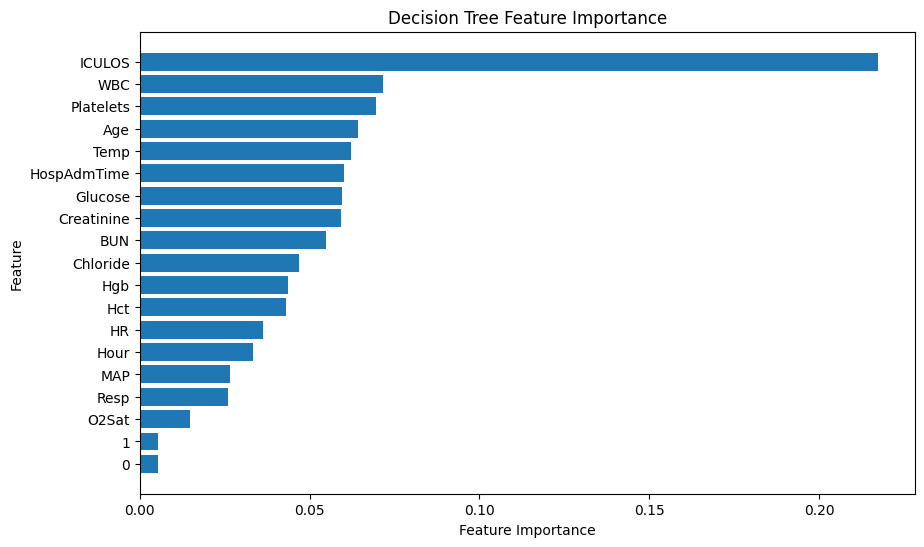

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Train your Decision Tree model as you did before
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Get the names of the features (assuming X_train is a DataFrame)
feature_names = X_train.columns

# Create a DataFrame to store feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score

# Generate dummy data

# Train your models
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Get predictions from each model
rf_predictions = rf_model.predict_proba(X_test)[:, 1]
xgb_predictions = xgb_model.predict_proba(X_test)[:, 1]
dt_predictions = dt_model.predict_proba(X_test)[:, 1]

# Aggregate predictions using simple averaging
aggregated_predictions = (rf_predictions + xgb_predictions + dt_predictions) / 3

# Calculate the AUC for the aggregated predictions
aggregated_auc = roc_auc_score(y_test, aggregated_predictions)

# Round the aggregated predictions to 0 or 1 based on a threshold (e.g., 0.5)
aggregated_predictions_binary = np.round(aggregated_predictions)

# Calculate F1 Score, Precision, Recall, and Accuracy
f1 = f1_score(y_test, aggregated_predictions_binary)
precision = precision_score(y_test, aggregated_predictions_binary)
recall = recall_score(y_test, aggregated_predictions_binary)
accuracy = accuracy_score(y_test, aggregated_predictions_binary)

print("AUC of Aggregated Predictions:", aggregated_auc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

AUC of Aggregated Predictions: 0.983171820906995
F1 Score: 0.9117647058823529
Precision: 0.893953488372093
Recall: 0.9303000968054211
Accuracy: 0.9391560353287537


In [ ]:
aggregated_predictions.shape

(9171,)

In [ ]:
rf_predictions.shape

(9171,)

In [ ]:
xgb_predictions.shape

(9171,)

In [ ]:
dt_predictions.shape

(9171,)

**Other evaluation metrics**

In [ ]:
rf_predictions.shape

(9171,)

In [ ]:
xgb_predictions.shape

(9171,)

In [ ]:
dt_predictions.shape

(9171,)

In [ ]:
aggregated_predictions.shape

(9171,)

In [ ]:
y_test.shape

(9171,)

In [ ]:
X_test.shape

(9171, 19)

In [ ]:
X_train.shape

(36681, 19)

In [ ]:
y_train.shape

(36681,)

In [ ]:
y_test

683149    0
726465    0
725236    1
46421     0
651677    0
         ..
109900    0
159032    0
306278    0
673683    1
417983    0
Name: SepsisLabel, Length: 9171, dtype: int64

کد زیرم هیچکدوم رو احتمالاتی محاسبه نکردم و نتایج رو میتونی ببینی

Epoch 1/50
50/50 [==============================] - 1s 6ms/step - loss: 0.5614 - accuracy: 0.8481 - val_loss: 0.4663 - val_accuracy: 0.9475
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4484 - accuracy: 0.9237 - val_loss: 0.3804 - val_accuracy: 0.9475
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3872 - accuracy: 0.9237 - val_loss: 0.3186 - val_accuracy: 0.9475
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3359 - accuracy: 0.9350 - val_loss: 0.2639 - val_accuracy: 0.9700
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.2912 - accuracy: 0.9444 - val_loss: 0.2194 - val_accuracy: 0.9700
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.2564 - accuracy: 0.9444 - val_loss: 0.1833 - val_accuracy: 0.9700
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.2341 - accuracy: 0.9444 - val_loss: 0.1593 - val_accuracy: 0.9700
Epoch 8/50
50/50 [==

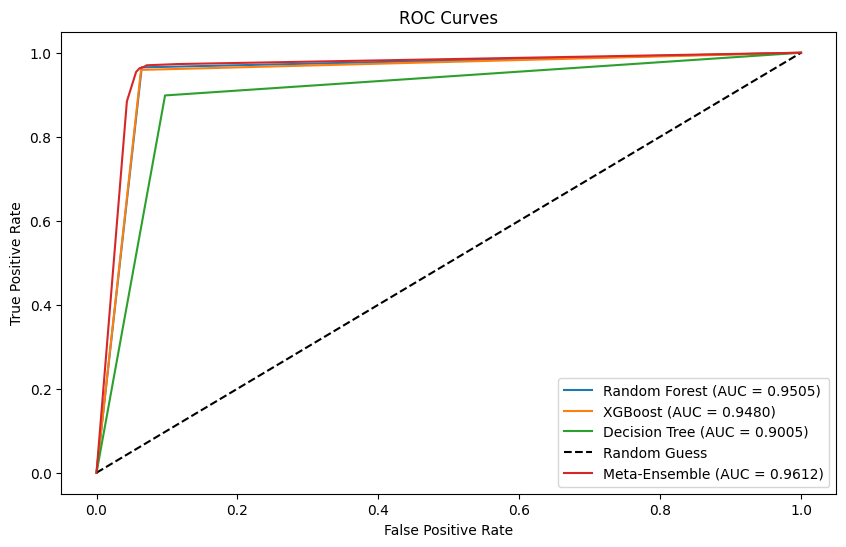

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense

# Generate some synthetic data for demonstration
X, y = make_classification(n_samples=10000, n_features=10, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train individual models
rf_model = RandomForestClassifier(n_estimators=300, random_state=0)
rf_model.fit(X_train, y_train)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Get predictions from each model
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

# Create a new dataset with the predictions as features
meta_features = np.column_stack((rf_predictions, xgb_predictions, dt_predictions))

# Define and train the meta-ensemble ANN
meta_model = Sequential()
meta_model.add(Dense(64, activation='relu', input_shape=(3,)))  # 3 is the number of base models
meta_model.add(Dense(1, activation='sigmoid'))

meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the meta-ensemble ANN
meta_model.fit(meta_features, y_test, epochs=50, batch_size=32, validation_split=0.2)

# Predict with the meta-ensemble model
meta_predictions = meta_model.predict(meta_features)

# Calculate the AUC for the meta-ensemble predictions
meta_auc = roc_auc_score(y_test, meta_predictions)
print("AUC of Meta-Ensemble Predictions:", meta_auc)

# Calculate the ROC curve and AUC for each individual model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predictions)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_predictions)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predictions)
meta_fpr, meta_tpr, _ = roc_curve(y_test, meta_predictions)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.4f})'.format(roc_auc_score(y_test, rf_predictions)))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = {:.4f})'.format(roc_auc_score(y_test, xgb_predictions)))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.4f})'.format(roc_auc_score(y_test, dt_predictions)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.plot(meta_fpr, meta_tpr, label='Meta-Ensemble (AUC = {:.4f})'.format(meta_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


برای حالات احتمالاتی سه مدل داریم:

In [ ]:
#XGBOOST_PROBABILITY

In [ ]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_model_prob = xgb.XGBClassifier()

# Train the XGBoost classifier on your training data
xgb_model_prob.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_test.shape

(9171,)

In [ ]:
# Use the trained XGBoost model to make predictions on the test data

# If you want probability scores (for binary classification)
xgb_probabilities_prob = xgb_model_prob.predict_proba(X_test)[:, 1]



In [ ]:
xgb_probabilities_prob.shape

(9171,)

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate the AUC score for the binary classification
auc_score = roc_auc_score(y_test, xgb_probabilities_prob)
print(f'AUC Score: {auc_score:.4f}')


AUC Score: 0.9638


In [ ]:
#result is better approximately 1.6 % when we use from probabilistic model   0.9480 ---> 0.9638

In [ ]:
#decision tree probabilities

In [ ]:
#result is same for two state:  0.8949

In [ ]:
#when working with DecisionTreeClassifier, the results will be the same for both prediction modes in terms of
#the predicted class labels, and the AUC will also be the same in both cases.

In [ ]:
# Assuming you have already loaded and preprocessed your training and testing data
# Make sure X_train and X_test have the same columns

# Train the Decision Tree Classifier on the training data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Now, ensure that X_test has the same columns as X_train
# For example, if X_train originally had 10 columns, then make sure X_test has the same 10 columns

# Get predictions from the Decision Tree Classifier in binary format
dt_predictions_binary = dt_model.predict(X_test)

# Get predicted probabilities for class 1 (SepsisLabel) from the Decision Tree Classifier
dt_predictions_proba = dt_model.predict_proba(X_test)[:, 1]

# Calculate the AUC for binary predictions
dt_auc_binary = roc_auc_score(y_test, dt_predictions_binary)
print("AUC of Decision Tree Predictions (Binary Format):", dt_auc_binary)

# Calculate the AUC for probability predictions
dt_auc_proba = roc_auc_score(y_test, dt_predictions_proba)
print("AUC of Decision Tree Predictions (Probability Format):", dt_auc_proba)


AUC of Decision Tree Predictions (Binary Format): 0.8949485011740367
AUC of Decision Tree Predictions (Probability Format): 0.8949485011740367


In [ ]:
dt_predictions_binary.shape

(9171,)

In [ ]:
#Random forest Probabilistic

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have loaded your data into X_train, X_test, y_train, y_test

# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Define and fit the RandomForestClassifier
model_RandomForest = RandomForestClassifier(n_estimators=300, random_state=0)
model_RandomForest.fit(X_train, y_train)

# Get predicted probabilities for class 1 (SepsisLabel)
rf_predictions_prob = model_RandomForest.predict_proba(X_test)[:, 1]  # Probability of class 1 (SepsisLabel)

# rfc_probabilities now contains the predicted probabilities for class 1


In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming you have the true labels in y_test
# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, rf_predictions_prob)
print(f'AUC: {auc:.4f}')


AUC: 0.9918


In [ ]:
#result is better approximately 4 % when we use from probabilistic model   0.9505 ---> 0.9918

Epoch 1/50
230/230 [==============================] - 2s 5ms/step - loss: 0.4542 - accuracy: 0.8904 - val_loss: 0.2241 - val_accuracy: 0.9450
Epoch 2/50
230/230 [==============================] - 1s 4ms/step - loss: 0.1778 - accuracy: 0.9471 - val_loss: 0.1345 - val_accuracy: 0.9526
Epoch 3/50
230/230 [==============================] - 1s 3ms/step - loss: 0.1354 - accuracy: 0.9542 - val_loss: 0.1160 - val_accuracy: 0.9559
Epoch 4/50
230/230 [==============================] - 1s 3ms/step - loss: 0.1236 - accuracy: 0.9579 - val_loss: 0.1100 - val_accuracy: 0.9580
Epoch 5/50
230/230 [==============================] - 1s 2ms/step - loss: 0.1184 - accuracy: 0.9586 - val_loss: 0.1056 - val_accuracy: 0.9575
Epoch 6/50
230/230 [==============================] - 1s 3ms/step - loss: 0.1148 - accuracy: 0.9597 - val_loss: 0.1030 - val_accuracy: 0.9580
Epoch 7/50
230/230 [==============================] - 1s 3ms/step - loss: 0.1126 - accuracy: 0.9617 - val_loss: 0.1010 - val_accuracy: 0.9586
Epoch 

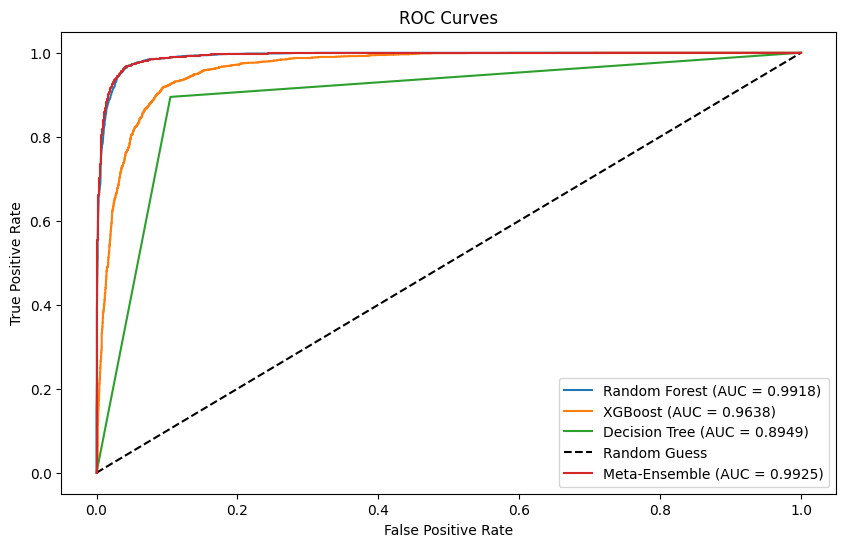

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense

# Generate some synthetic data for demonstration


# Create a new dataset with the predictions as features
meta_features = np.column_stack((rf_predictions_prob, xgb_probabilities_prob, dt_predictions_binary))

# Define and train the meta-ensemble ANN
meta_model = Sequential()
meta_model.add(Dense(64, activation='relu', input_shape=(3,)))  # 3 is the number of base models
meta_model.add(Dense(1, activation='sigmoid'))

meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the meta-ensemble ANN
meta_model.fit(meta_features, y_test, epochs=50, batch_size=32, validation_split=0.2)

# Predict with the meta-ensemble model
meta_prob = meta_model.predict(meta_features)

# Calculate the AUC for the meta-ensemble predictions
meta_auc = roc_auc_score(y_test, meta_prob)
print("AUC of Meta-Ensemble Predictions:", meta_auc)

# Calculate the ROC curve and AUC for each individual model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predictions_prob)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probabilities_prob)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predictions_binary)
meta_fpr, meta_tpr, _ = roc_curve(y_test, meta_prob)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.4f})'.format(roc_auc_score(y_test, rf_predictions_prob)))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = {:.4f})'.format(roc_auc_score(y_test, xgb_probabilities_prob)))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.4f})'.format(roc_auc_score(y_test, dt_predictions_binary)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.plot(meta_fpr, meta_tpr, label='Meta-Ensemble (AUC = {:.4f})'.format(meta_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


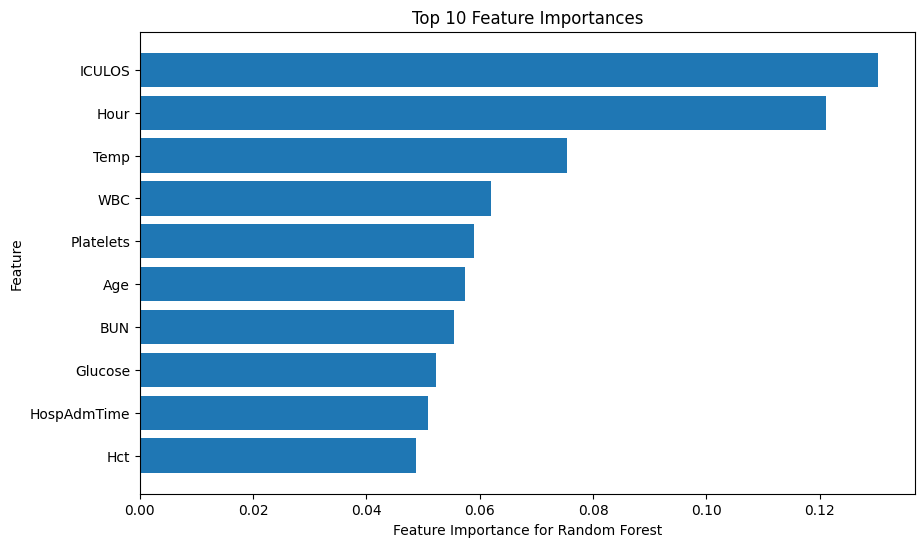

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have loaded your data into X_train, X_test, y_train, y_test

# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Define and fit the RandomForestClassifier
model_RandomForest = RandomForestClassifier(n_estimators=300, random_state=0)
model_RandomForest.fit(X_train, y_train)

# Get feature importances from the trained RandomForestClassifier
feature_importances = model_RandomForest.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features
top_n = 10  # Change to the number of top features you want to visualize
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance_df['Importance'][:top_n], align='center')
plt.yticks(range(top_n), feature_importance_df['Feature'][:top_n])
plt.xlabel('Feature Importance for Random Forest')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances'.format(top_n))
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()


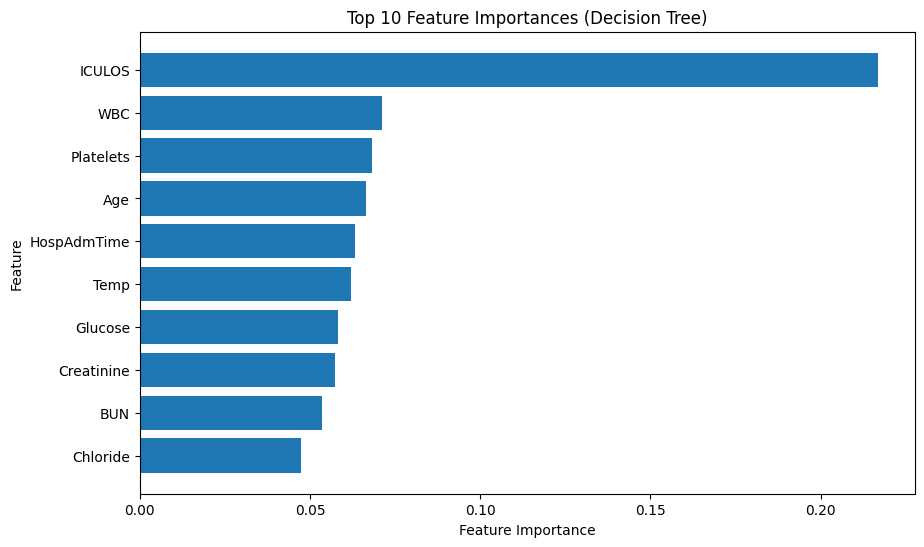

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assuming you have loaded your data into X_train, X_test, y_train, y_test

# Train the Decision Tree Classifier on the training data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Get feature importances from the trained Decision Tree Classifier
feature_importances = dt_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features
top_n = 10  # Change to the number of top features you want to visualize
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance_df['Importance'][:top_n], align='center')
plt.yticks(range(top_n), feature_importance_df['Feature'][:top_n])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances (Decision Tree)'.format(top_n))
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()


AUC Score: 0.9638


<Figure size 1000x600 with 0 Axes>

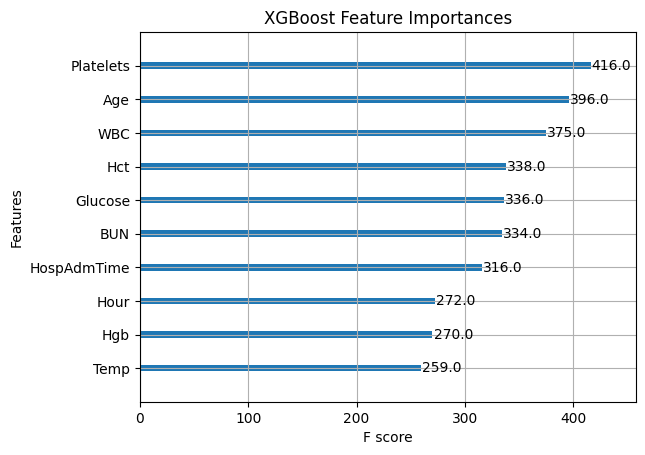

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Assuming you have loaded and preprocessed your data into X_train, X_test, y_train, y_test

# Create an XGBoost classifier
xgb_model_prob = xgb.XGBClassifier()

# Train the XGBoost classifier on your training data
xgb_model_prob.fit(X_train, y_train)

# Use the trained XGBoost model to make predictions on the test data
xgb_probabilities_prob = xgb_model_prob.predict_proba(X_test)[:, 1]

# Calculate the AUC score for the binary classification
auc_score = roc_auc_score(y_test, xgb_probabilities_prob)
print(f'AUC Score: {auc_score:.4f}')

# Plot feature importances
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model_prob, importance_type='weight', max_num_features=10)  # You can adjust max_num_features
plt.title('XGBoost Feature Importances')
plt.show()
